### Set parameters

In [1]:
#load the %autoreload extension using the %load_ext magic command
#Then, we set the %autoreload magic command to 2, which means that modules will be reloaded every time a cell is executed
%load_ext autoreload
%autoreload 2

In [2]:
# DATASET_NAME = 'snps_SMALL_ref_alt'
# DATASET_NAME = 'clinvar_snps'
DATASET_NAME = 'clinvar_snps.variant_sequences_details.stats'
# DATASET_NAME = 'all_snps'
# DATASET_NAME = 'snps'

CUT_POSITION_MODEL_INPUT = 100

In [3]:
import pandas as pd

# result_df = pd.read_csv('stats_' + DATASET_NAME)
result_df = pd.read_pickle(DATASET_NAME + '.pkl')

In [4]:
result_df

,transcript_ids,sequences,alt_sequences,ref_alts,first_codons,cut_distances_from_first_cds_nt,variant_position_relative_to_transcript,info,ref_pred,alt_pred,prediction_diff
0,ENST00000335137,GGCAACGCATGTGTCGGCATTATGGCTGTCACATGGGGAATTGGCT...,GGCAACGCATGTGTCGGCATTATGGCTGTCACATGGGGAATTGGCT...,C/G,ATG,490,526,"ALLELEID=2238986;CLNDISDB=MeSH:D030342,MedGen:...",0.858665,0.880766,0.022100
1,ENST00000641515,GGCAACGCATGTGTCGGCATTATGGCTGTCACATGGGGAATTGGCT...,GGCAACGCATGTGTCGGCATTATGGCTGTCACATGGGGAATTGGCT...,C/G,ATG,490,613,"ALLELEID=2238986;CLNDISDB=MeSH:D030342,MedGen:...",0.858665,0.880766,0.022100
2,ENST00000335137,CAATGAGGTCGATAGTTTTTATTGTGACCTTCCTAGGGTAATCAAA...,CAATGAGGTCGATAGTTTTTATTGTGACCTTCCTAGGGTAATCAAA...,G/A,ATG,591,627,"ALLELEID=2386655;CLNDISDB=MeSH:D030342,MedGen:...",0.046858,0.052050,0.005191
3,ENST00000641515,CAATGAGGTCGATAGTTTTTATTGTGACCTTCCTAGGGTAATCAAA...,CAATGAGGTCGATAGTTTTTATTGTGACCTTCCTAGGGTAATCAAA...,G/A,ATG,591,714,"ALLELEID=2386655;CLNDISDB=MeSH:D030342,MedGen:...",0.046858,0.052050,0.005191
4,ENST00000335137,TGCTAACAGTGGTGTGCTCACTGTGTGTTCTTTTGTTCTTCTAATC...,TGCTAACAGTGGTGTGCTCACTGTGTGTTCTTTTGTTCTTCTAATC...,T/C,ATG,678,714,"ALLELEID=2278803;CLNDISDB=MeSH:D030342,MedGen:...",0.022194,0.032758,0.010563
...,...,...,...,...,...,...,...,...,...,...,...
329405,ENST00000361567,AACAGCCCTAGACCTCAACTACCTAACCAACAAACTTAAAATAAAA...,AACAGCCCTAGACCTCAACTACCTAACCAACAAACTTAAAATAAAA...,A/G,ATA,1596,1596,"ALLELEID=680527;CLNDISDB=MONDO:MONDO:0009723,M...",0.688251,0.682778,0.005473
329406,ENST00000361567,ACAGCCCTAGACCTCAACTACCTAACCAACAAACTTAAAATAAAAT...,ACAGCCCTAGACCTCAACTACCTAACCAACAAACTTAAAATAAAAT...,C/T,ATA,1597,1597,"ALLELEID=680528;CLNDISDB=MONDO:MONDO:0009723,M...",0.546291,0.533701,0.012590
329407,ENST00000361567,GACCTCAACTACCTAACCAACAAACTTAAAATAAAATCCCCACTAT...,GACCTCAACTACCTAACCAACAAACTTAAAATAAAATCCCCACTAT...,C/T,ATA,1606,1606,"ALLELEID=680529;CLNDISDB=MONDO:MONDO:0009723,M...",0.594251,0.603455,0.009205
329408,ENST00000361567,CTCAACTACCTAACCAACAAACTTAAAATAAAATCCCCACTATGCA...,CTCAACTACCTAACCAACAAACTTAAAATAAAATCCCCACTATGCA...,T/C,ATA,1609,1609,"ALLELEID=680530;CLNDISDB=MONDO:MONDO:0009723,M...",0.534759,0.634548,0.099789


In [5]:
try:
    result_df = result_df.drop('pred', axis='columns')
except KeyError as e:
    print(e)

"['pred'] not found in axis"


In [6]:
result_df = result_df.rename(columns={
    'sequences':'ref_sequence',
    'alt_sequences':'alt_sequence',
    'ref_alts':'ref_alt'
})

In [7]:
if DATASET_NAME == 'snps':
    DATASET_NAME += '_common'
FIGURES_FOLDER = 'figures/{}/'.format(DATASET_NAME)

In [8]:
result_df[['prediction_diff']] = result_df[['prediction_diff']].round(6)

In [9]:
# result_df = result_df.drop('Unnamed: 0', axis=1).sort_values('prediction_diff', ascending=False, inplace=False)
result_df = result_df.sort_values('prediction_diff', ascending=False, inplace=False)

In [10]:
result_df = result_df[result_df['first_codons'] == 'ATG'] 

In [11]:
# Count exact (relative) prediction differences 

def add_exact_prediction_difference(row):
    return row['ref_pred'] - row['alt_pred']    

result_df['exact_diff'] = result_df.apply(add_exact_prediction_difference, axis=1)

In [12]:
cols = result_df.columns.tolist()

In [13]:
cols = cols[0:1] + cols[len(cols)-1:len(cols)] + cols[1:-1]

In [14]:
result_df = result_df[cols]

In [15]:
#EXPLORE
print('Total number of variants: {}'.format(result_df.shape[0]))
result_df.sort_values('exact_diff', ascending=False, inplace=False)

Total number of variants: 328567


,transcript_ids,exact_diff,ref_sequence,alt_sequence,ref_alt,first_codons,cut_distances_from_first_cds_nt,variant_position_relative_to_transcript,info,ref_pred,alt_pred,prediction_diff
28417,ENST00000233146,0.822643,GCCGGACGCCGCTCGGGGGACGTGGGAGGGGAGGCGGGAAACAGCT...,GCCGGACGCCGCTCGGGGGACGTGGGAGGGGAGGCGGGAAACAGCT...,A/C,ATG,0,223,"ALLELEID=96307;CLNDISDB=MeSH:D003123,MedGen:C0...",0.869643,0.047000,0.822643
28419,ENST00000233146,0.809435,GCCGGACGCCGCTCGGGGGACGTGGGAGGGGAGGCGGGAAACAGCT...,GCCGGACGCCGCTCGGGGGACGTGGGAGGGGAGGCGGGAAACAGCT...,A/T,ATG,0,223,"ALLELEID=96309;CLNDISDB=MeSH:D003123,MedGen:C0...",0.869643,0.060208,0.809435
114291,ENST00000508376,0.752703,TGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATC...,TGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATC...,A/C,ATG,5021,5178,"ALLELEID=1600689;CLNDISDB=MONDO:MONDO:0021056,...",0.874237,0.121534,0.752703
114290,ENST00000257430,0.752703,TGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATC...,TGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATC...,A/C,ATG,5021,5077,"ALLELEID=1600689;CLNDISDB=MONDO:MONDO:0021056,...",0.874237,0.121534,0.752703
28422,ENST00000233146,0.745687,CCGGACGCCGCTCGGGGGACGTGGGAGGGGAGGCGGGAAACAGCTT...,CCGGACGCCGCTCGGGGGACGTGGGAGGGGAGGCGGGAAACAGCTT...,T/G,ATG,1,224,"ALLELEID=232501;CLNDISDB=MeSH:D003123,MedGen:C...",0.817249,0.071561,0.745687
...,...,...,...,...,...,...,...,...,...,...,...,...
314365,ENST00000335473,-0.658898,GAAGGCCCAGGAGCTGGGCTCCAGTGCGACACCAACCAAAAAGACT...,GAAGGCCCAGGAGCTGGGCTCCAGTGCGACACCAACCAAAAAGACT...,C/G,ATG,477,727,ALLELEID=1410172;CLNDISDB=MedGen:CN517202;CLND...,0.117836,0.776734,0.658898
314367,ENST00000536101,-0.658898,GAAGGCCCAGGAGCTGGGCTCCAGTGCGACACCAACCAAAAAGACT...,GAAGGCCCAGGAGCTGGGCTCCAGTGCGACACCAACCAAAAAGACT...,C/G,ATG,477,736,ALLELEID=1410172;CLNDISDB=MedGen:CN517202;CLND...,0.117836,0.776734,0.658898
162867,ENST00000220676,-0.680749,GTGCCAAGGAAAGAATAGCAAATCATCATACAGAGGAGAAGGGTAG...,GTGCCAAGGAAAGAATAGCAAATCATCATACAGAGGAGAAGGGTAG...,T/A,ATG,5624,5772,ALLELEID=2082615;CLNDISDB=MedGen:CN517202;CLND...,0.180034,0.860783,0.680749
223043,ENST00000380152,-0.778399,AAAAATTTGCCAAACGAAAATTATGGCAGGTTGTTACGAGGCATTG...,AAAAATTTGCCAAACGAAAATTATGGCAGGTTGTTACGAGGCATTG...,C/G,ATG,5745,5978,"ALLELEID=1499555;CLNDISDB=MONDO:MONDO:0003582,...",0.056945,0.835344,0.778399


In [16]:
from utils import compare_sequence

seqs_to_compare = result_df.sort_values('prediction_diff', ascending=False, inplace=False)[:3]
for (a,b) in zip(
    seqs_to_compare['ref_sequence'],
    seqs_to_compare['alt_sequence']
):
    compare_sequence(a,b)
    print(a[CUT_POSITION_MODEL_INPUT], '->', b[CUT_POSITION_MODEL_INPUT], '\n', '\n', '\n')

Length of Sequence A: 201
Length of Sequence B: 201
GCCGGACGCCGCTCGGGGGACGTGGGAGGGGAGGCGGGAAACAGCTTAGTGGGTGTGGGGTCGCGCATTTTCTTCAACCAGGAGGTGAGGAGGTTTCGACATGGCGGTGCAGCCGAAGGAGACGCTGCAGTTGGAGAGCGCGGCCGAGGTCGGCTTCGTGCGCTTCTTTCAGGGCATGCCGGAGAAGCCGACCACCACAGT
║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║-║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║
GCCGGACGCCGCTCGGGGGACGTGGGAGGGGAGGCGGGAAACAGCTTAGTGGGTGTGGGGTCGCGCATTTTCTTCAACCAGGAGGTGAGGAGGTTTCGACCTGGCGGTGCAGCCGAAGGAGACGCTGCAGTTGGAGAGCGCGGCCGAGGTCGGCTTCGTGCGCTTCTTTCAGGGCATGCCGGAGAAGCCGACCACCACAGT 

A -> C 
 
 

Length of Sequence A: 201
Length of Sequence B: 201
GCCGGACGCCGCTCGGGGGACGTGGGAGGGGAGGCGGGAAACAGCTTAGTGGGTGTGGGGTCGCGCATTTTCTTCAACCAGGAGGTGAGGAGGTTTCGACATGGCGGTGCAGCCGAAGGAGACGCTGCAGTTGGAGAGCGCGGCCGAGGTCGGCTTCGTGCGCTTCTTTCAGGGCATGCCGGAGAAGCCGACCACCACAGT
║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║║

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def print_histogram_bins(values, bins, titles=['title', 'xlabel', 'ylabel'], color='skyblue'):
    plt.style.use('seaborn-darkgrid')

    counts, bin_edges = np.histogram(values, bins=bins)
    # counts = [log(x) if x > 0 else 0 for x in counts]

    bin_labels = [f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]

    fig, ax = plt.subplots(figsize=(6, 5))
    # fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(bin_labels, counts, edgecolor='black', color=color, alpha=0.7)

    # Aesthetics
    ax.set_ylabel(titles[2], fontsize=14)
    ax.set_xlabel(titles[1], fontsize=14)
    ax.set_title(titles[0], fontsize=12, pad=20)
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.xticks(rotation=60)
    plt.tight_layout()

    plt.savefig(FIGURES_FOLDER + titles[0][:75] + ".png", dpi=300, bbox_inches='tight')
    print([str(x) + ':' + str(y) for (x,y) in zip(bin_edges, counts)])
    
    plt.show()
    # plt.close()
    return [(x,y) for (x,y) in zip(bin_edges, counts)]

    
def get_hist_title(title_texts, zoom_range = None):
    return "Zoom on range {} {} \n {}".format(zoom_range, title_texts[0], title_texts[1])


/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.0:144795', '0.05:76870', '0.1:45013', '0.15:24920', '0.2:14596', '0.25:8743', '0.3:5913', '0.35:3671', '0.4:2118', '0.45:1147', '0.5:447', '0.55:219', '0.6:65', '0.65:24', '0.7:20', '0.75:4', '0.8:2', '0.85:0', '0.9:0', '0.95:0']


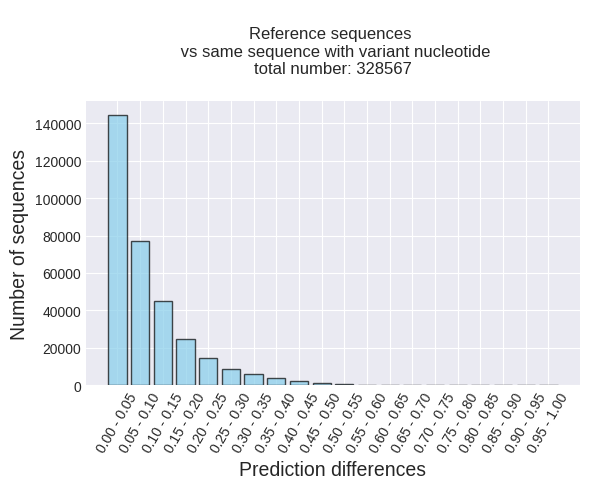

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.0:144795', '0.05:76870', '0.1:45013', '0.15000000000000002:24920', '0.2:14596', '0.25:8743']


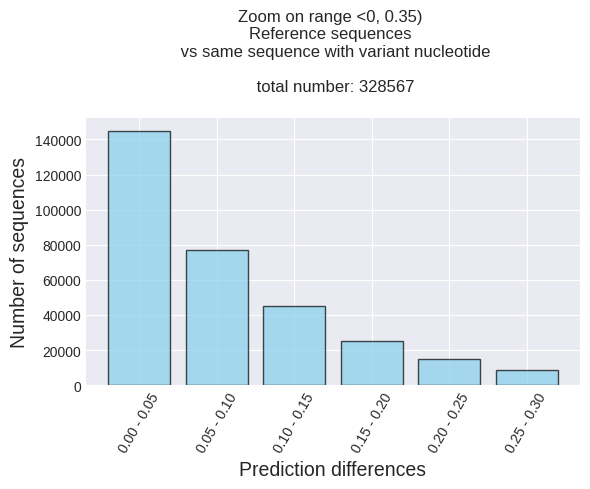

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.3:5913', '0.35:3671', '0.39999999999999997:2118', '0.44999999999999996:1147', '0.49999999999999994:447', '0.5499999999999999:219']


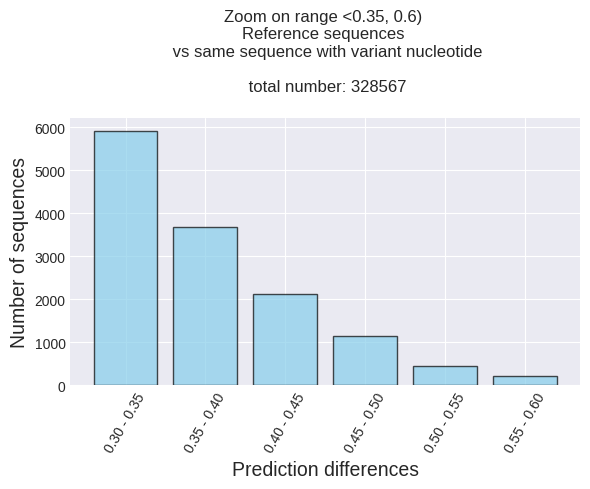

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.6:65', '0.65:24', '0.7000000000000001:20', '0.7500000000000001:4', '0.8000000000000002:2', '0.8500000000000002:0', '0.9000000000000002:0']


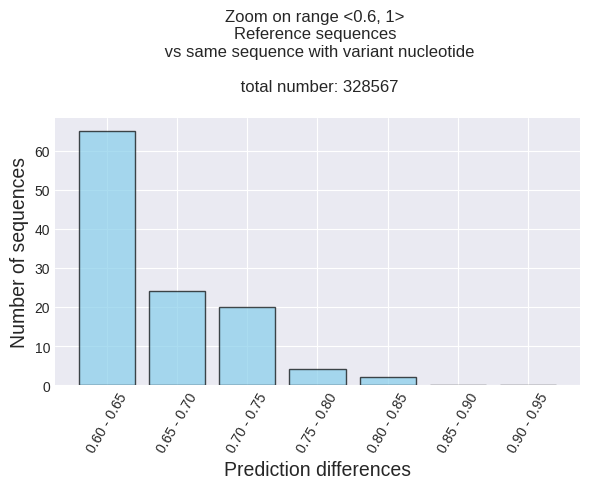

[(0.6, 65),
 (0.65, 24),
 (0.7000000000000001, 20),
 (0.7500000000000001, 4),
 (0.8000000000000002, 2),
 (0.8500000000000002, 0),
 (0.9000000000000002, 0)]

In [18]:
from math import log

# PRED_DIFF_PLOT_TITLE = ['Dataset: {}; total number: {}'.format(DATASET_NAME, result_df.shape[0]), '\n\nReference sequences \n vs same sequence with variant nucleotide']
PRED_DIFF_PLOT_TITLE = ['\nReference sequences \n vs same sequence with variant nucleotide\n', 'total number: {}'.format(result_df.shape[0])]
SPLIT1 = 0.35
SPLIT2 = 0.6
print_histogram_bins(
   result_df['prediction_diff'].array,
    bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    titles = [
        PRED_DIFF_PLOT_TITLE[0] + PRED_DIFF_PLOT_TITLE[1],
        'Prediction differences', 
        'Number of sequences'
    ]
)

# range x < SPLIT1
print_histogram_bins(
    [x for x in result_df['prediction_diff'].array if x < SPLIT1],
    bins = np.arange(0.0, SPLIT1, 0.05),
    # bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
    titles = [
        get_hist_title(PRED_DIFF_PLOT_TITLE, zoom_range="<0, {})".format(SPLIT1)),
        # "{} \nZoom on range <0, {}) \n {}".format(PRED_DIFF_PLOT_TITLE[0], SPLIT, PRED_DIFF_PLOT_TITLE[1]),
        'Prediction differences', 
        'Number of sequences'
    ]
)

# range SPLIT1 <= x < SPLIT2 
print_histogram_bins(
    [x for x in result_df['prediction_diff'].array if SPLIT1-0.05 <= x and x < SPLIT2+0.04],
    bins = np.arange(SPLIT1-0.05, SPLIT2+0.04, 0.05),
    # bins = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    titles = [
        get_hist_title(PRED_DIFF_PLOT_TITLE, zoom_range="<{}, {})".format(SPLIT1, SPLIT2)),
        # "{} \nZoom on range <{}, 1> \n {}".format(PRED_DIFF_PLOT_TITLE[0], SPLIT, PRED_DIFF_PLOT_TITLE[1]),
        'Prediction differences', 
        'Number of sequences'
    ]
)

# range SPLIT2 <= x
print_histogram_bins(
    [x for x in result_df['prediction_diff'].array if SPLIT2 <= x],
    bins = np.arange(SPLIT2, 1.0, 0.05),
    # bins = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    titles = [
        get_hist_title(PRED_DIFF_PLOT_TITLE, zoom_range="<{}, 1>".format(SPLIT2)),
        # "{} \nZoom on range <{}, 1> \n {}".format(PRED_DIFF_PLOT_TITLE[0], SPLIT, PRED_DIFF_PLOT_TITLE[1]),
        'Prediction differences', 
        'Number of sequences'
    ]
)

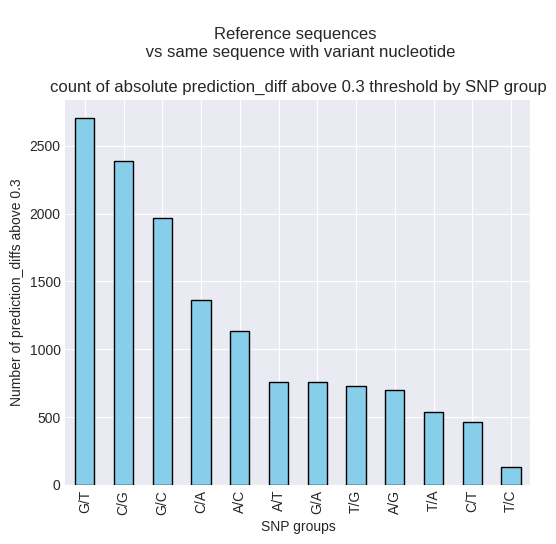

In [19]:
# def get_simple_hist(df, threshold, 'prediction_diff')
THRESHOLD = 0.3

# result_df[result_df['ref_alt'] == 'A/C'].sort_values('prediction_diff', ascending=False, inplace=False)
result_grouped = result_df[result_df['prediction_diff'] > THRESHOLD].copy().groupby('ref_alt', group_keys=True)['prediction_diff'].count()
title_grouped_by_snp = '{} \ncount of absolute prediction_diff above {} threshold by SNP group'.format(PRED_DIFF_PLOT_TITLE[0], THRESHOLD)

plot = result_grouped.sort_values(ascending=False).plot(kind='bar', title = title_grouped_by_snp, ylabel='Number of prediction_diffs above {}'.format(THRESHOLD),
         xlabel='SNP groups', figsize=(6, 5), edgecolor='black', color='skyblue')
fig = plot.get_figure()
fig.savefig(FIGURES_FOLDER + title_grouped_by_snp + ".png")

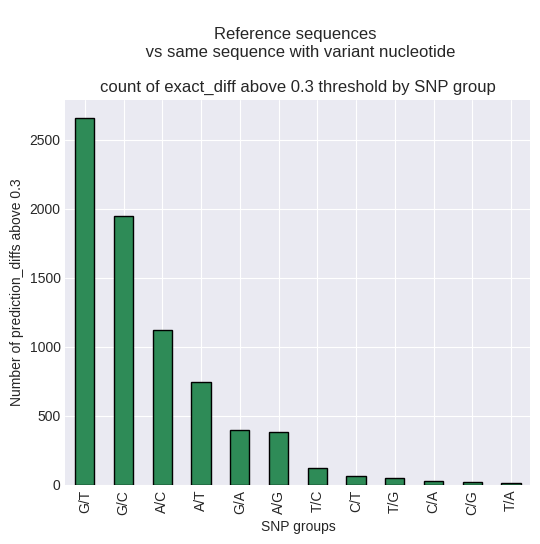

In [20]:
THRESHOLD = 0.3

# result_df[result_df['ref_alt'] == 'A/C'].sort_values('prediction_diff', ascending=False, inplace=False)
result_grouped = result_df[result_df['exact_diff'] > THRESHOLD].copy().groupby('ref_alt', group_keys=True)['prediction_diff'].count()
title_grouped_by_snp = '{} \ncount of exact_diff above {} threshold by SNP group'.format(PRED_DIFF_PLOT_TITLE[0], THRESHOLD)

plot = result_grouped.sort_values(ascending=False).plot(kind='bar', title = title_grouped_by_snp, ylabel='Number of prediction_diffs above {}'.format(THRESHOLD),
         xlabel='SNP groups', figsize=(6, 5), edgecolor='black', color='seagreen')
fig = plot.get_figure()
fig.savefig(FIGURES_FOLDER + title_grouped_by_snp + ".png")

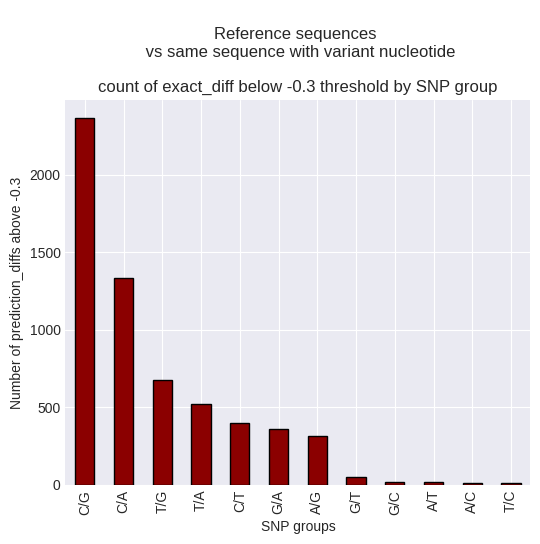

In [21]:
THRESHOLD = -0.3

# result_df[result_df['ref_alt'] == 'A/C'].sort_values('prediction_diff', ascending=False, inplace=False)
result_grouped = result_df[result_df['exact_diff'] < THRESHOLD].copy().groupby('ref_alt', group_keys=True)['prediction_diff'].count()
title_grouped_by_snp = '{} \ncount of exact_diff below {} threshold by SNP group'.format(PRED_DIFF_PLOT_TITLE[0], THRESHOLD)

plot = result_grouped.sort_values(ascending=False).plot(kind='bar', title = title_grouped_by_snp, ylabel='Number of prediction_diffs above {}'.format(THRESHOLD),
         xlabel='SNP groups', figsize=(6, 5), edgecolor='black', color='darkred')
fig = plot.get_figure()
fig.savefig(FIGURES_FOLDER + title_grouped_by_snp + ".png")

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.0:69417', '0.05:34884', '0.1:20027', '0.15:11709', '0.2:6963', '0.25:4478', '0.3:3194', '0.35:1980', '0.4:1193', '0.45:688', '0.5:259', '0.55:149', '0.6:36', '0.65:20', '0.7:20', '0.75:2', '0.8:2', '0.85:0', '0.9:0', '0.95:0']


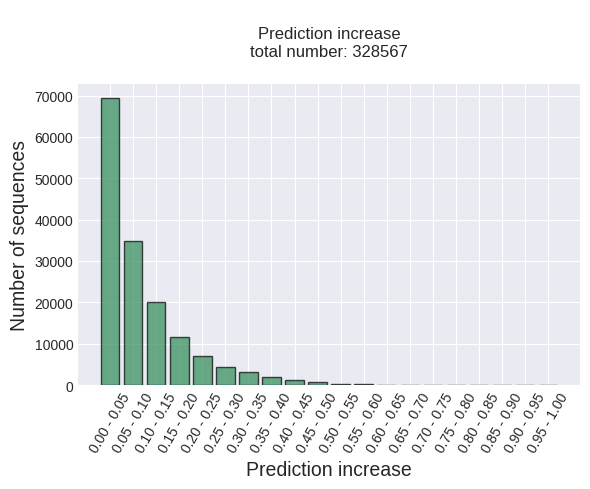

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.0:69417', '0.05:34884', '0.1:20027', '0.15000000000000002:11709', '0.2:6963', '0.25:4478']


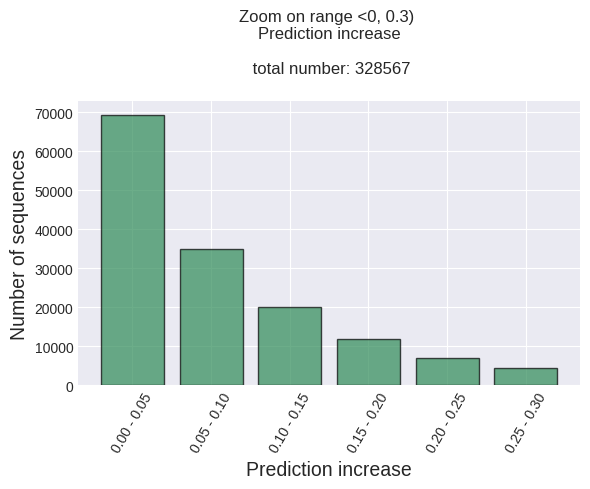

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.3:3194', '0.35:1980', '0.39999999999999997:1193', '0.44999999999999996:688', '0.49999999999999994:259', '0.5499999999999999:149']


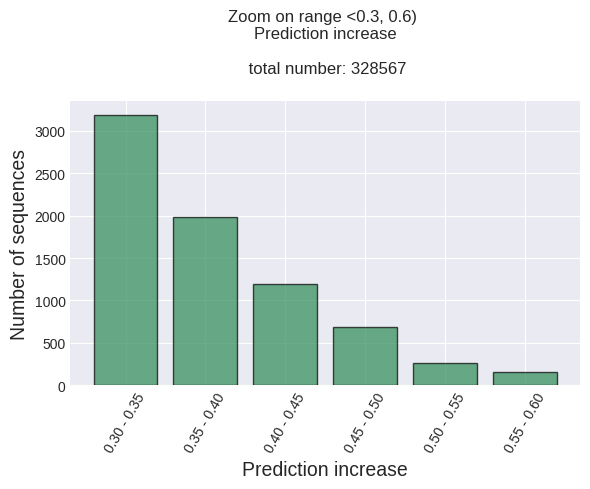

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.6:36', '0.65:20', '0.7000000000000001:20', '0.7500000000000001:2', '0.8000000000000002:2', '0.8500000000000002:0', '0.9000000000000002:0']


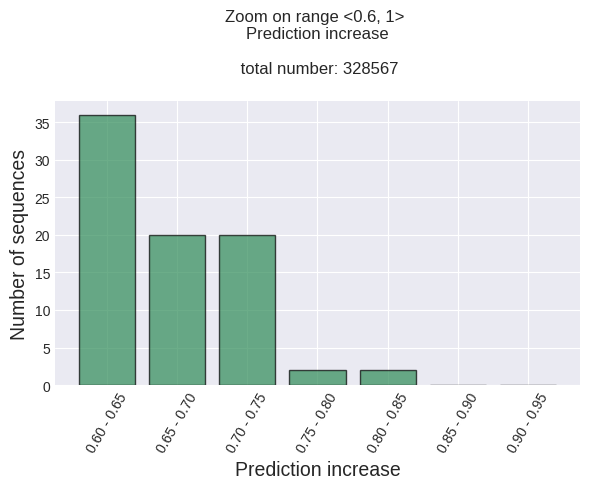

[(0.6, 36),
 (0.65, 20),
 (0.7000000000000001, 20),
 (0.7500000000000001, 2),
 (0.8000000000000002, 2),
 (0.8500000000000002, 0),
 (0.9000000000000002, 0)]

In [22]:
from math import log

# PRED_DIFF_PLOT_TITLE = ['Dataset: {}; total number: {}'.format(DATASET_NAME, result_df.shape[0]), '\n\n Exact prediction difference \n of reference sequences \n vs same sequence with variant nucleotide']
# PRED_DIFF_PLOT_TITLE = ['\nReference sequences \n vs same sequence with variant nucleotide\n', 'total number: {}'.format(result_df.shape[0])]
PRED_DIFF_PLOT_TITLE = ['\nPrediction increase\n', 'total number: {}'.format(result_df.shape[0])]
SPLIT1 = 0.35
SPLIT2 = 0.6
COLUMN_TO_VIS = 'exact_diff'
COLOR = 'seagreen'

print_histogram_bins(
   result_df[COLUMN_TO_VIS].array,
    bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    titles = [
        PRED_DIFF_PLOT_TITLE[0] + PRED_DIFF_PLOT_TITLE[1],
        'Prediction increase', 
        'Number of sequences'
    ],
    color=COLOR,
)

# range x < SPLIT1
print_histogram_bins(
    [x for x in result_df[COLUMN_TO_VIS].array if x < SPLIT1],
    bins = np.arange(0.0, SPLIT1, 0.05),
    # bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
    titles = [
        get_hist_title(PRED_DIFF_PLOT_TITLE, zoom_range="<0, {})".format(SPLIT1-0.05)),
        # "{} \nZoom on range <0, {}) \n {}".format(PRED_DIFF_PLOT_TITLE[0], SPLIT, PRED_DIFF_PLOT_TITLE[1]),
        'Prediction increase', 
        'Number of sequences'
    ],
    color=COLOR,
)

# range SPLIT1 <= x < SPLIT2 
print_histogram_bins(
    [x for x in result_df[COLUMN_TO_VIS].array if SPLIT1-0.05 <= x and x < SPLIT2+0.04],
    bins = np.arange(SPLIT1-0.05, SPLIT2+0.04, 0.05),
    # bins = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    titles = [
        get_hist_title(PRED_DIFF_PLOT_TITLE, zoom_range="<{}, {})".format(SPLIT1-0.05, SPLIT2)),
        # "{} \nZoom on range <{}, 1> \n {}".format(PRED_DIFF_PLOT_TITLE[0], SPLIT, PRED_DIFF_PLOT_TITLE[1]),
        'Prediction increase', 
        'Number of sequences'
    ],
    color=COLOR,
)

# range SPLIT2 <= x
print_histogram_bins(
    [x for x in result_df[COLUMN_TO_VIS].array if SPLIT2 <= x],
    bins = np.arange(SPLIT2, 1.0, 0.05),
    # bins = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    titles = [
        get_hist_title(PRED_DIFF_PLOT_TITLE, zoom_range="<{}, 1>".format(SPLIT2)),
        # "{} \nZoom on range <{}, 1> \n {}".format(PRED_DIFF_PLOT_TITLE[0], SPLIT, PRED_DIFF_PLOT_TITLE[1]),
        'Prediction increase', 
        'Number of sequences'
    ],
    color=COLOR,
)

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.0:75380', '0.05:41989', '0.1:24981', '0.15:13211', '0.2:7633', '0.25:4265', '0.3:2719', '0.35:1691', '0.4:925', '0.45:459', '0.5:188', '0.55:70', '0.6:29', '0.65:4', '0.7:0', '0.75:2', '0.8:0', '0.85:0', '0.9:0', '0.95:0']


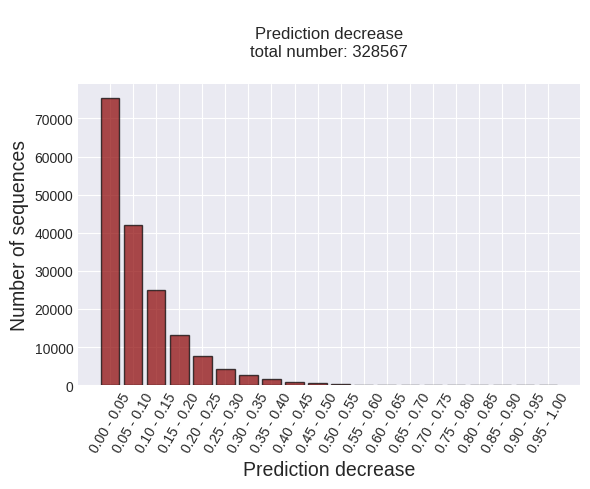

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.0:75380', '0.05:41989', '0.1:24981', '0.15000000000000002:13211', '0.2:7633', '0.25:4265']


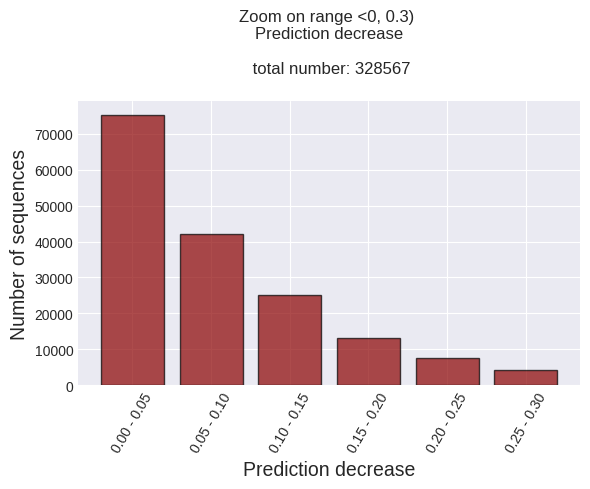

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.3:2719', '0.35:1691', '0.39999999999999997:925', '0.44999999999999996:459', '0.49999999999999994:188', '0.5499999999999999:70']


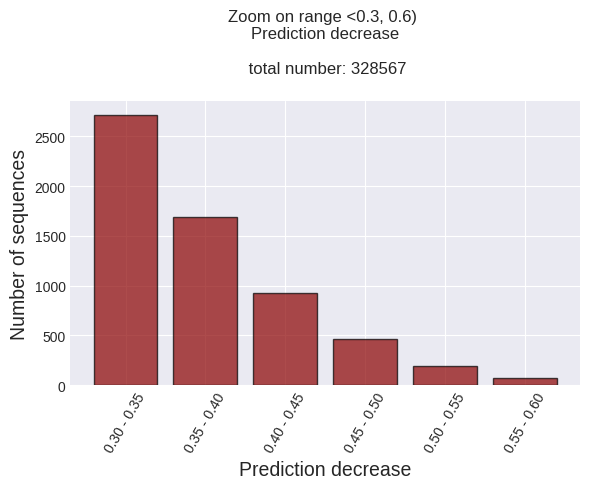

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.6:29', '0.65:4', '0.7000000000000001:0', '0.7500000000000001:2', '0.8000000000000002:0', '0.8500000000000002:0', '0.9000000000000002:0']


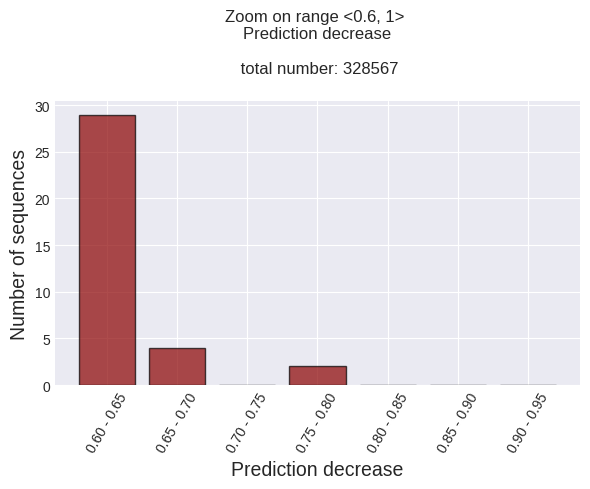

[(0.6, 29),
 (0.65, 4),
 (0.7000000000000001, 0),
 (0.7500000000000001, 2),
 (0.8000000000000002, 0),
 (0.8500000000000002, 0),
 (0.9000000000000002, 0)]

In [23]:
from math import log

# PRED_DIFF_PLOT_TITLE = ['Dataset: {}; total number: {}'.format(DATASET_NAME, result_df.shape[0]), '\n\n Exact prediction difference \n of reference sequences \n vs same sequence with variant nucleotide']
PRED_DIFF_PLOT_TITLE = ['\nPrediction decrease\n', 'total number: {}'.format(result_df.shape[0])]

SPLIT1 = 0.35
SPLIT2 = 0.6
COLUMN_TO_VIS = 'exact_diff'
COLOR = 'darkred'
TO_PRINT_NEGATIVES = -1

print_histogram_bins(
    [abs(x) for x in result_df[COLUMN_TO_VIS].array if x < 0],
    bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    titles = [
        PRED_DIFF_PLOT_TITLE[0] + PRED_DIFF_PLOT_TITLE[1],
        'Prediction decrease', 
        'Number of sequences'
    ],
    color=COLOR,
)

# range x < SPLIT1
print_histogram_bins(
    [abs(x) for x in result_df[COLUMN_TO_VIS].array if x < 0 and abs(x) < SPLIT1],
    bins = np.arange(0.0, SPLIT1, 0.05),
    # bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
    titles = [
        get_hist_title(PRED_DIFF_PLOT_TITLE, zoom_range="<0, {})".format(SPLIT1-0.05)),
        # "{} \nZoom on range <0, {}) \n {}".format(PRED_DIFF_PLOT_TITLE[0], SPLIT, PRED_DIFF_PLOT_TITLE[1]),
        'Prediction decrease', 
        'Number of sequences'
    ],
    color=COLOR,
)

# range SPLIT1 <= x < SPLIT2 
print_histogram_bins(
    [abs(x) for x in result_df[COLUMN_TO_VIS].array if x < 0 and SPLIT1-0.05 <= abs(x) and abs(x) < SPLIT2+0.04],
    bins = np.arange(SPLIT1-0.05, SPLIT2+0.04, 0.05),
    # bins = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    titles = [
        get_hist_title(PRED_DIFF_PLOT_TITLE, zoom_range="<{}, {})".format(SPLIT1-0.05, SPLIT2)),
        # "{} \nZoom on range <{}, 1> \n {}".format(PRED_DIFF_PLOT_TITLE[0], SPLIT, PRED_DIFF_PLOT_TITLE[1]),
        'Prediction decrease', 
        'Number of sequences'
    ],
    color=COLOR,
)

# range SPLIT2 <= x
print_histogram_bins(
    [abs(x) for x in result_df[COLUMN_TO_VIS].array if x < 0 and SPLIT2 <= abs(x)],
    bins = np.arange(SPLIT2, 1.0, 0.05),
    # bins = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    titles = [
        get_hist_title(PRED_DIFF_PLOT_TITLE, zoom_range="<{}, 1>".format(SPLIT2)),
        # "{} \nZoom on range <{}, 1> \n {}".format(PRED_DIFF_PLOT_TITLE[0], SPLIT, PRED_DIFF_PLOT_TITLE[1]),
        'Prediction decrease', 
        'Number of sequences'
    ],
    color=COLOR,
)

#### get codon and amino changes based on frame index

In [24]:
from utils import find_codon_frame_index, translate_codon_to_amino, get_amino_change, GENETIC_CODE, classify_variant_consequence, Variant_consequence


result_df['frame_index'] = result_df.cut_distances_from_first_cds_nt.map(find_codon_frame_index)

codon_changes = []
amino_changes = []
variant_consequences = []

for row in result_df.itertuples():
    old_codon = None
    new_codon = None
        
    old_codon = row.ref_sequence[CUT_POSITION_MODEL_INPUT-row.frame_index:CUT_POSITION_MODEL_INPUT+3-row.frame_index]
    new_codon = row.alt_sequence[CUT_POSITION_MODEL_INPUT-row.frame_index:CUT_POSITION_MODEL_INPUT+3-row.frame_index]
        
    codon_changes.append("{}/{}".format(old_codon, new_codon))
    amino_changes.append(get_amino_change(old_codon, new_codon))
    try:
        variant_consequences.append(classify_variant_consequence(old_codon, new_codon).value)
    except ValueError as e: 
        print('Error: ', e)
        print(old_codon, new_codon)
        print(row.exact_diff)
        variant_consequences.append(None)
        
    
result_df['codon'] = codon_changes
result_df['amino'] = amino_changes
result_df['variant_consequence'] = variant_consequences

Error:  Codon is None
TAC TAN
0.06720908297531353
Error:  Codon is None
TAC TAN
0.06720908297531353


In [25]:
result_df.columns

Index(['transcript_ids', 'exact_diff', 'ref_sequence', 'alt_sequence',
       'ref_alt', 'first_codons', 'cut_distances_from_first_cds_nt',
       'variant_position_relative_to_transcript', 'info', 'ref_pred',
       'alt_pred', 'prediction_diff', 'frame_index', 'codon', 'amino',
       'variant_consequence'],
      dtype='object')

total_count  6087
variant_consequence
Amino_retained      1136
Missense_variant    4804
Start_lost            69
Stop_gained           73
Stop_lost              5
Name: exact_diff, dtype: int64


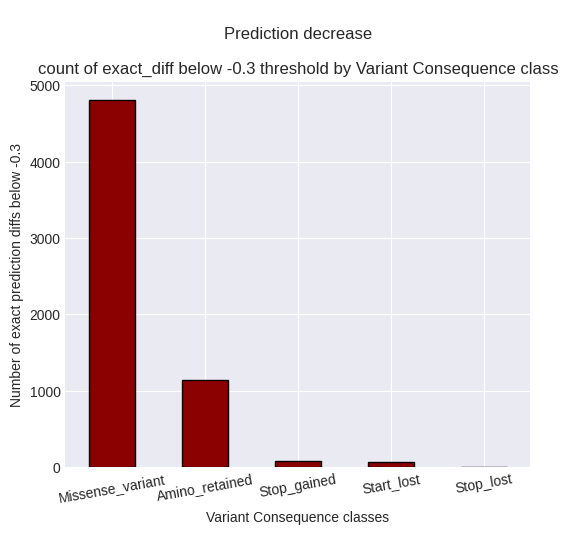

In [26]:
THRESHOLD = -0.3

result_filtered = result_df[result_df['exact_diff'] < THRESHOLD].copy()
total_count = result_filtered.shape[0]
print('total_count ',total_count) 
result_grouped = result_filtered.groupby('variant_consequence', group_keys=True)['exact_diff'].count()
print(result_grouped)

title_grouped_by_snp = '{} \ncount of exact_diff below {} threshold by Variant Consequence class'.format(PRED_DIFF_PLOT_TITLE[0], THRESHOLD)

plot = result_grouped.sort_values(ascending=False).plot(kind='bar', title = title_grouped_by_snp, ylabel='Number of exact prediction diffs below {}'.format(THRESHOLD),
         xlabel='Variant Consequence classes', edgecolor='black', color='darkred', rot=10, figsize=(6, 5))
    
# plot.rot(60)
fig = plot.get_figure()
fig.savefig(FIGURES_FOLDER + title_grouped_by_snp + ".png")

total_count  7543
variant_consequence
Amino_retained       918
Missense_variant    6065
Start_lost           152
Stop_gained          407
Stop_lost              1
Name: exact_diff, dtype: int64


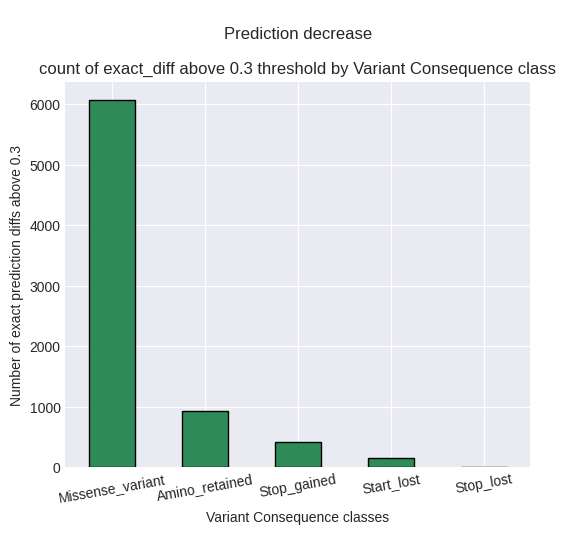

In [27]:
THRESHOLD = 0.3

result_filtered = result_df[result_df['exact_diff'] > THRESHOLD].copy()
total_count = result_filtered.shape[0]
print('total_count ',total_count) 
result_grouped = result_filtered.groupby('variant_consequence', group_keys=True)['exact_diff'].count()
print(result_grouped)

title_grouped_by_snp = '{} \ncount of exact_diff above {} threshold by Variant Consequence class'.format(PRED_DIFF_PLOT_TITLE[0], THRESHOLD)

plot = result_grouped.sort_values(ascending=False).plot(kind='bar', title = title_grouped_by_snp, ylabel='Number of exact prediction diffs above {}'.format(THRESHOLD),
         xlabel='Variant Consequence classes', figsize=(6, 5), edgecolor='black', color='seagreen',  rot=10)
fig = plot.get_figure()
fig.savefig(FIGURES_FOLDER + title_grouped_by_snp + ".png")

total_count  6087
variant_consequence
Amino_retained      1136
Missense_variant    4804
Start_lost            69
Stop_gained           73
Stop_lost              5
Name: exact_diff, dtype: int64


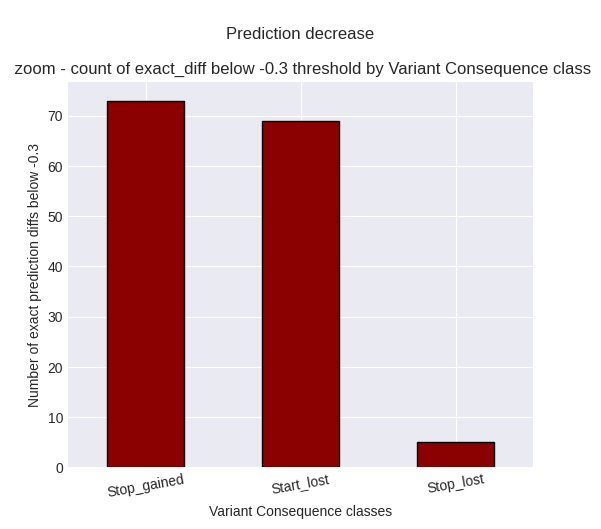

In [28]:
THRESHOLD = -0.3

result_filtered = result_df[result_df['exact_diff'] < THRESHOLD].copy()
total_count = result_filtered.shape[0]
print('total_count ',total_count) 
result_grouped = result_filtered.groupby('variant_consequence', group_keys=True)['exact_diff'].count()
print(result_grouped)
result_grouped = result_grouped[['Stop_gained', 'Start_lost', 'Stop_lost']]

title_grouped_by_snp = '{} \n zoom - count of exact_diff below {} threshold by Variant Consequence class'.format(PRED_DIFF_PLOT_TITLE[0], THRESHOLD)

plot = result_grouped.sort_values(ascending=False).plot(kind='bar', title = title_grouped_by_snp, ylabel='Number of exact prediction diffs below {}'.format(THRESHOLD),
         xlabel='Variant Consequence classes', figsize=(6, 5), edgecolor='black', color='darkred',  rot=10)
# plot.rot(60)
fig = plot.get_figure()
fig.savefig(FIGURES_FOLDER + title_grouped_by_snp + ".png")

total_count  7543
variant_consequence
Amino_retained       918
Missense_variant    6065
Start_lost           152
Stop_gained          407
Stop_lost              1
Name: exact_diff, dtype: int64


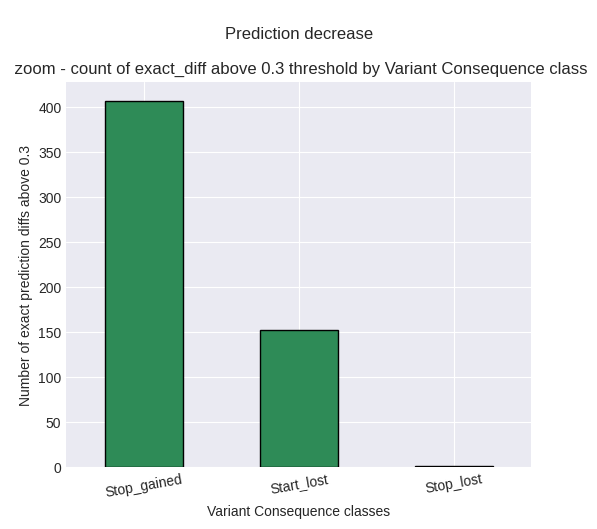

In [29]:
THRESHOLD = 0.3

result_filtered = result_df[result_df['exact_diff'] > THRESHOLD].copy()
total_count = result_filtered.shape[0]
print('total_count ',total_count) 
result_grouped = result_filtered.groupby('variant_consequence', group_keys=True)['exact_diff'].count()
print(result_grouped)
result_grouped = result_grouped[['Stop_gained', 'Start_lost', 'Stop_lost']]

title_grouped_by_snp = '{} \n zoom - count of exact_diff above {} threshold by Variant Consequence class'.format(PRED_DIFF_PLOT_TITLE[0], THRESHOLD)

plot = result_grouped.sort_values(ascending=False).plot(kind='bar', title = title_grouped_by_snp, ylabel='Number of exact prediction diffs above {}'.format(THRESHOLD),
         xlabel='Variant Consequence classes', figsize=(6, 5), edgecolor='black', color='seagreen',  rot=10)
fig = plot.get_figure()
fig.savefig(FIGURES_FOLDER + title_grouped_by_snp + ".png")

In [30]:
NUMBER_TO_ALPHABET = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
}

In [31]:
THRESHOLD = -0.3

result_filtered = result_df[result_df.amino.str.len() != 1]
result_filtered = result_filtered[result_filtered['exact_diff'] < THRESHOLD].copy()
total_count = result_filtered.shape[0]
print('total_count ',total_count) 
result_grouped = result_filtered.groupby('amino', group_keys=True)['exact_diff'].count()
print(result_grouped)
# result_grouped = result_grouped[['Stop_gained', 'Start_lost', 'Stop_lost']]

SPLIT_INDEX = result_grouped.size //4
result_grouped_split = []
result_grouped_split.append(result_grouped.sort_values(ascending=False)[:SPLIT_INDEX])
result_grouped_split.append(result_grouped.sort_values(ascending=False)[SPLIT_INDEX:2*SPLIT_INDEX])
result_grouped_split.append(result_grouped.sort_values(ascending=False)[2*SPLIT_INDEX:3*SPLIT_INDEX])
result_grouped_split.append(result_grouped.sort_values(ascending=False)[3*SPLIT_INDEX:])

print(sum([result_grouped_split[0].size, result_grouped_split[1].size, result_grouped_split[2].size, result_grouped_split[3].size]))

for idx, subseries in enumerate(result_grouped_split):
    title_grouped_by_snp = '{}) {} \ncount of exact_diff below {} threshold by SNP-induced amino acid change'.format(NUMBER_TO_ALPHABET[idx], PRED_DIFF_PLOT_TITLE[0], THRESHOLD)

    plot = subseries.sort_values(ascending=False).plot(kind='bar', title = title_grouped_by_snp, ylabel='Number of exact prediction diffs below {}'.format(THRESHOLD),
             xlabel='amino acid change', figsize=(6, 5), edgecolor='black', color='darkred', rot=60)
    fig = plot.get_figure()
    fig.savefig(FIGURES_FOLDER + title_grouped_by_snp + ".png")
    plt.close()

total_count  4951
amino
*/E      3
*/L      1
*/W      1
A/D     47
A/E    254
      ... 
W/S      1
Y/*     12
Y/D     24
Y/F      3
Y/N      2
Name: exact_diff, Length: 111, dtype: int64
111


In [32]:
THRESHOLD = 0.3

result_filtered = result_df[result_df.amino.str.len() != 1]
result_filtered = result_filtered[result_filtered['exact_diff'] > THRESHOLD].copy()
total_count = result_filtered.shape[0]
print('total_count ',total_count) 
result_grouped = result_filtered.groupby('amino', group_keys=True)['exact_diff'].count()
print(result_grouped)
# result_grouped = result_grouped[['Stop_gained', 'Start_lost', 'Stop_lost']]

SPLIT_INDEX = result_grouped.size //4
result_grouped_split = []
result_grouped_split.append(result_grouped.sort_values(ascending=False)[:SPLIT_INDEX])
result_grouped_split.append(result_grouped.sort_values(ascending=False)[SPLIT_INDEX:2*SPLIT_INDEX])
result_grouped_split.append(result_grouped.sort_values(ascending=False)[2*SPLIT_INDEX:3*SPLIT_INDEX])
result_grouped_split.append(result_grouped.sort_values(ascending=False)[3*SPLIT_INDEX:])

print(sum([result_grouped_split[0].size, result_grouped_split[1].size, result_grouped_split[2].size, result_grouped_split[3].size]))

for idx, subseries in enumerate(result_grouped_split):
    title_grouped_by_snp = '{}) {} \ncount of exact_diff above {} threshold by SNP-induced amino acid change'.format(NUMBER_TO_ALPHABET[idx], PRED_DIFF_PLOT_TITLE[0], THRESHOLD)

    plot = subseries.sort_values(ascending=False).plot(kind='bar', title = title_grouped_by_snp, ylabel='Number of exact prediction diffs above {}'.format(THRESHOLD),
             xlabel='amino acid change', figsize=(6, 5), edgecolor='black', color='seagreen', rot=60)
    fig = plot.get_figure()
    fig.savefig(FIGURES_FOLDER + title_grouped_by_snp + ".png")
    plt.close()

total_count  6625
amino
*/C      1
A/P     45
A/S    278
A/T     36
C/R      1
      ... 
W/R      3
Y/*      3
Y/C     12
Y/H      2
Y/S     19
Name: exact_diff, Length: 110, dtype: int64
110


In [33]:
result_amino_retained = result_df[result_df.variant_consequence == Variant_consequence.Amino_retained.value]
result_amino_retained.shape[0]

79828

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['-1.0:0', '-0.95:0', '-0.8999999999999999:0', '-0.8499999999999999:0', '-0.7999999999999998:0', '-0.7499999999999998:0', '-0.6999999999999997:1', '-0.6499999999999997:3', '-0.5999999999999996:12', '-0.5499999999999996:25', '-0.49999999999999956:86', '-0.4499999999999995:142', '-0.39999999999999947:317', '-0.3499999999999994:550']


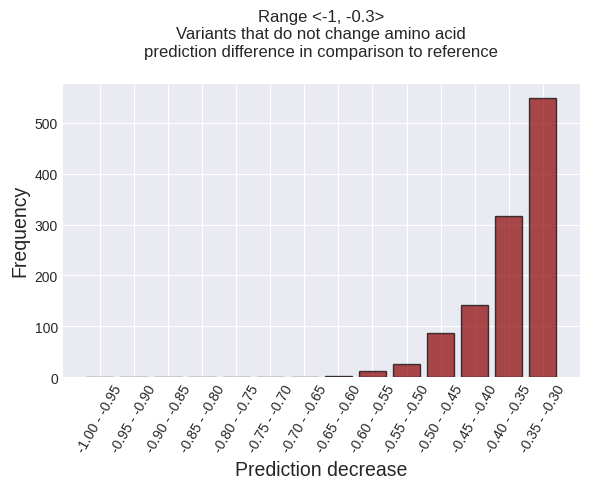

[(-1.0, 0),
 (-0.95, 0),
 (-0.8999999999999999, 0),
 (-0.8499999999999999, 0),
 (-0.7999999999999998, 0),
 (-0.7499999999999998, 0),
 (-0.6999999999999997, 1),
 (-0.6499999999999997, 3),
 (-0.5999999999999996, 12),
 (-0.5499999999999996, 25),
 (-0.49999999999999956, 86),
 (-0.4499999999999995, 142),
 (-0.39999999999999947, 317),
 (-0.3499999999999994, 550)]

In [34]:
THRESHOLD = -0.3
COLUMN_TO_VIS = 'exact_diff'
PRED_DIFF_PLOT_TITLE = 'Range <-1, {}>\nVariants that do not change amino acid\nprediction difference in comparison to reference'.format(THRESHOLD)
COLOR = 'darkred'

print_histogram_bins(
    # [abs(x) for x in result_amino_retained[result_amino_retained.exact_diff < THRESHOLD][COLUMN_TO_VIS].array if x < 0 and SPLIT2 <= abs(x)],
    result_amino_retained[result_amino_retained.exact_diff < THRESHOLD][COLUMN_TO_VIS].array,
    bins = np.arange(-1, THRESHOLD+0.01, 0.05),
    # bins = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    titles = [
        PRED_DIFF_PLOT_TITLE,
        # "{} \nZoom on range <{}, 1> \n {}".format(PRED_DIFF_PLOT_TITLE[0], SPLIT, PRED_DIFF_PLOT_TITLE[1]),
        'Prediction decrease', 
        'Frequency'
    ],
    color=COLOR,
)

/tmp/ipykernel_7514/3177702747.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


['0.3:413', '0.35:252', '0.39999999999999997:141', '0.44999999999999996:71', '0.49999999999999994:35', '0.5499999999999999:4', '0.5999999999999999:0', '0.6499999999999999:0', '0.7:0', '0.7499999999999999:2', '0.7999999999999998:0', '0.8499999999999999:0', '0.8999999999999999:0']


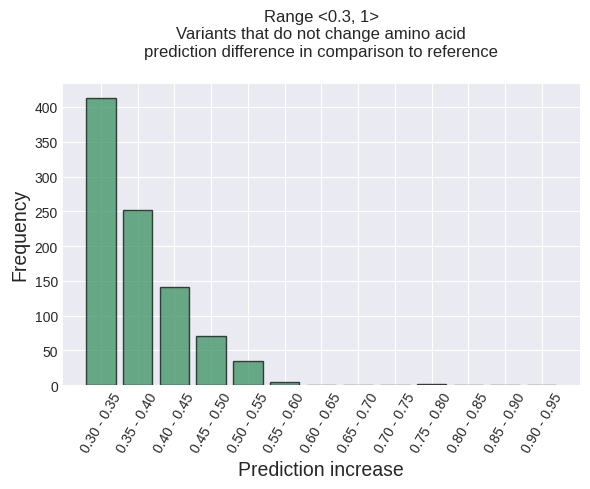

[(0.3, 413),
 (0.35, 252),
 (0.39999999999999997, 141),
 (0.44999999999999996, 71),
 (0.49999999999999994, 35),
 (0.5499999999999999, 4),
 (0.5999999999999999, 0),
 (0.6499999999999999, 0),
 (0.7, 0),
 (0.7499999999999999, 2),
 (0.7999999999999998, 0),
 (0.8499999999999999, 0),
 (0.8999999999999999, 0)]

In [35]:
THRESHOLD = 0.3
COLUMN_TO_VIS = 'exact_diff'
PRED_DIFF_PLOT_TITLE = 'Range <{}, 1>\nVariants that do not change amino acid\nprediction difference in comparison to reference'.format(THRESHOLD)
COLOR = 'seagreen'

print_histogram_bins(
    # [abs(x) for x in result_amino_retained[result_amino_retained.exact_diff < THRESHOLD][COLUMN_TO_VIS].array if x < 0 and SPLIT2 <= abs(x)],
    result_amino_retained[result_amino_retained.exact_diff > THRESHOLD][COLUMN_TO_VIS].array,
    bins = np.arange(THRESHOLD, 1, 0.05),
    # bins = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    titles = [
        PRED_DIFF_PLOT_TITLE,
        # "{} \nZoom on range <{}, 1> \n {}".format(PRED_DIFF_PLOT_TITLE[0], SPLIT, PRED_DIFF_PLOT_TITLE[1]),
        'Prediction increase', 
        'Frequency'
    ],
    color=COLOR,
)

### Variants that do not change amino acid - exploration

In [36]:
result_amino_retained[['exact_diff']] = result_amino_retained[['exact_diff']].round(6)

/tmp/ipykernel_7514/1463589140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_amino_retained[['exact_diff']] = result_amino_retained[['exact_diff']].round(6)


### TODO process INFO 

In [37]:
def parse_clinvar_info_column_to_dict(info_sample):
    data = {}
    data_list = info_sample.split(';')
    
    for item in data_list:
        key, value = item.split('=', 1)

        if key == "CLNDISDB":
            disdb_parts = value.split(',')
            data[key] = {}
            for part in disdb_parts:
                db_key, db_value = part.split(':', 1)
                if ':' in db_value:  # Handle cases like MONDO:MONDO:0021056
                    db_value = db_value.split(':')[1]
                data[key].setdefault(db_key, []).append(db_value)
        elif key == "GENEINFO":
            gene, info = value.split(':')
            data[key] = {gene: info}
        elif key == "CLNHGVS":
            parts = value.split(':')
            chrom_ref, change = parts[0], parts[1].split('g.')[1]
            from_allele, to_allele = change[-3], change[-1]
            location = change[:-3]
            data[key] = {
                "chromosome_ref": chrom_ref,
                "variation_type": "g",
                "location": location,
                "change": {"from": from_allele, "to": to_allele}
            }
        elif key == "CLNREVSTAT":
            data[key] = value.split(',')
        elif key == "MC":
            so, variant_type = value.split('|')
            data[key] = {"SO": [so.split(':')[1]], "variant_type": variant_type}
        else:
            data[key] = value

    return data

# Example usage:
clinvar_sample = 'ALLELEID=1600689;CLNDISDB=MONDO:MONDO:0021056,MedGen:C2713442,OMIM:175100;CLNDN=Familial_adenomatous_polyposis_1;CLNHGVS=NC_000005.10:g.112840616A>C;CLNREVSTAT=criteria_provided,_single_submitter;CLNSIG=Likely_benign;CLNVC=single_nucleotide_variant;CLNVCSO=SO:0001483;GENEINFO=APC:324;MC=SO:0001819|synonymous_variant;ORIGIN=1'

parsed_data = parse_clinvar_info_column_to_dict(clinvar_sample)
print(parsed_data)


{'ALLELEID': '1600689', 'CLNDISDB': {'MONDO': ['0021056'], 'MedGen': ['C2713442'], 'OMIM': ['175100']}, 'CLNDN': 'Familial_adenomatous_polyposis_1', 'CLNHGVS': {'chromosome_ref': 'NC_000005.10', 'variation_type': 'g', 'location': '112840616', 'change': {'from': 'A', 'to': 'C'}}, 'CLNREVSTAT': ['criteria_provided', '_single_submitter'], 'CLNSIG': 'Likely_benign', 'CLNVC': 'single_nucleotide_variant', 'CLNVCSO': 'SO:0001483', 'GENEINFO': {'APC': '324'}, 'MC': {'SO': ['0001819'], 'variant_type': 'synonymous_variant'}, 'ORIGIN': '1'}


In [38]:
import time
from collections import OrderedDict


def parse_first_level_of_info_to_list(info):
    info_processed = OrderedDict()
    for item in info.split(';'):
        line_split = item.split('=')
        info_processed[line_split[0]] = line_split[1]
    return info_processed

def get_allele_id_from_info(info_sample):
    return parse_first_level_of_info_to_list(info_sample)['ALLELEID']

head_samples = result_amino_retained[:3]
head_samples['ALLELEID'] = head_samples['info'].map(get_allele_id_from_info)
head_samples

/tmp/ipykernel_7514/1111474978.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_samples['ALLELEID'] = head_samples['info'].map(get_allele_id_from_info)


,transcript_ids,exact_diff,ref_sequence,alt_sequence,ref_alt,first_codons,cut_distances_from_first_cds_nt,variant_position_relative_to_transcript,info,ref_pred,alt_pred,prediction_diff,frame_index,codon,amino,variant_consequence,ALLELEID
114291,ENST00000508376,0.752703,TGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATC...,TGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATC...,A/C,ATG,5021,5178,"ALLELEID=1600689;CLNDISDB=MONDO:MONDO:0021056,...",0.874237,0.121534,0.752703,2,GGA/GGC,G,Amino_retained,1600689
114290,ENST00000257430,0.752703,TGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATC...,TGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATC...,A/C,ATG,5021,5077,"ALLELEID=1600689;CLNDISDB=MONDO:MONDO:0021056,...",0.874237,0.121534,0.752703,2,GGA/GGC,G,Amino_retained,1600689
162867,ENST00000220676,-0.680749,GTGCCAAGGAAAGAATAGCAAATCATCATACAGAGGAGAAGGGTAG...,GTGCCAAGGAAAGAATAGCAAATCATCATACAGAGGAGAAGGGTAG...,T/A,ATG,5624,5772,ALLELEID=2082615;CLNDISDB=MedGen:CN517202;CLND...,0.180034,0.860783,0.680749,2,GGT/GGA,G,Amino_retained,2082615


In [39]:
result_amino_retained['ALLELEID'] = result_amino_retained['info'].map(get_allele_id_from_info)

THRESHOLD = 0.3

result_amino_retained_high_diff = result_amino_retained[result_amino_retained.prediction_diff > THRESHOLD]

### Because ALLELE ID is unique for a variant gene 
### but there might be more records in CLINVAR referencing the same ALLELE ID but holding different other information 
print(
    len(result_amino_retained_high_diff['ALLELEID'].unique()), 
    result_amino_retained_high_diff['ALLELEID'].count()
)

920 2054


/tmp/ipykernel_7514/2988019741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_amino_retained['ALLELEID'] = result_amino_retained['info'].map(get_allele_id_from_info)


#### TODO continue gene ontology for this genes / allels / transcripts

In [40]:
print(len(result_amino_retained_high_diff.transcript_ids.unique()))
print(len(result_amino_retained_high_diff[result_amino_retained_high_diff.exact_diff < -0.3].transcript_ids.unique()))
print(len(result_amino_retained_high_diff[result_amino_retained_high_diff.exact_diff > 0.3].transcript_ids.unique()))

trans_ids_synonymous_amino_high_diff_abs = result_amino_retained_high_diff.transcript_ids.unique()
trans_ids_synonymous_amino_high_diff_pos = result_amino_retained_high_diff[result_amino_retained_high_diff.exact_diff > 0.3].transcript_ids.unique()
trans_ids_synonymous_amino_high_diff_neg = result_amino_retained_high_diff[result_amino_retained_high_diff.exact_diff < -0.3].transcript_ids.unique()

len(set(trans_ids_synonymous_amino_high_diff_pos) & set(trans_ids_synonymous_amino_high_diff_neg))
trans_ids_synonymous_amino_high_diff_pos_neg_intersect = set(trans_ids_synonymous_amino_high_diff_pos) & set(trans_ids_synonymous_amino_high_diff_neg)

776
545
474


In [41]:
import inspect

def get_variable_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

In [42]:
for trans_ids in [
    trans_ids_synonymous_amino_high_diff_neg, 
    trans_ids_synonymous_amino_high_diff_pos, 
    trans_ids_synonymous_amino_high_diff_abs, 
    trans_ids_synonymous_amino_high_diff_pos_neg_intersect
]:
    with open(f"results/{get_variable_name(trans_ids)[0]}.txt", "w") as text_file:
        for i in trans_ids:
            print(i, end=" ", file=text_file)

<Figure size 640x480 with 0 Axes>

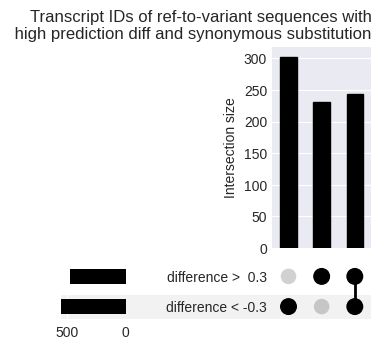

In [43]:
import upsetplot

trans_ids_dict = dict()
trans_ids_dict['difference >  0.3'] = set(trans_ids_synonymous_amino_high_diff_pos)
trans_ids_dict['difference < -0.3'] = set(trans_ids_synonymous_amino_high_diff_neg)

def plot_upset(set_to_visualize, set_categories, filename):
    upset_data_sub = upsetplot.from_contents({k: v for k, v in set_to_visualize.items() if k.startswith(set_categories)})
    plt.tight_layout()
    upsetplot.plot(upset_data_sub)
    # plt.xlabel('unique transcripts count') #loc='left', 'center', 'right'
    plt.title(
        'Transcript IDs of ref-to-variant sequences with\n high prediction diff and synonymous substitution',
         loc='right',
    )
    plt.savefig(filename)#pad_inches=0.8
    return

plot_upset(
    trans_ids_dict, 
    ('difference >  0.3', 'difference < -0.3'),
    f"figures/{DATASET_NAME}/Transcript IDs of ref-to-variant sequences with high prediction diff and synonymous substitution.png"
)

In [44]:
# diff_positive = result_amino_retained_high_diff[result_amino_retained_high_diff.exact_diff > 0.3]['info'].map(parse_first_level_of_info_to_list)

# diff_positive_genes = []
# for info_dict in diff_positive:
#     diff_positive_genes.append(info_dict['GENEINFO'].split(':')[0])
# _ = [print(i,end=',\n') for i in set(diff_positive_genes)]

In [46]:
info_unpacked = []
for info in result_amino_retained_high_diff['info'].map(parse_first_level_of_info_to_list):
    info_unpacked.append(info)
    
result_amino_retained_high_diff['info_dict'] = info_unpacked

/tmp/ipykernel_7514/3749484604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_amino_retained_high_diff['info_dict'] = info_unpacked


In [50]:
clinical_significance = []
for info in result_amino_retained_high_diff[result_amino_retained_high_diff.exact_diff < -0.3]['info'].map(parse_first_level_of_info_to_list):
    clinical_significance.append(info['CLNSIG'])

In [51]:
from collections import Counter

from utils import Clinical_significance


Counter(clinical_significance)

Counter({'Likely_benign': 965,
         'Benign': 74,
         'Uncertain_significance': 38,
         'Conflicting_interpretations_of_pathogenicity': 27,
         'Benign/Likely_benign': 32})

In [52]:
Clinical_significance.Conflicting_interpretations_of_pathogenicity.value

'Conflicting_interpretations_of_pathogenicity'

In [53]:
clnsig_column = []
for row in result_amino_retained_high_diff.itertuples():
    clnsig = row.info_dict['CLNSIG']
    clnsig = clnsig.replace('/','_')
    clnsig_column.append(Clinical_significance[clnsig].value)
    # [result_amino_retained_high_diff.exact_diff < -0.3.].info

In [54]:
result_amino_retained_high_diff['CLNSIG'] = clnsig_column

/tmp/ipykernel_7514/2904315765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_amino_retained_high_diff['CLNSIG'] = clnsig_column


In [55]:
result_amino_retained_high_diff

,transcript_ids,exact_diff,ref_sequence,alt_sequence,ref_alt,first_codons,cut_distances_from_first_cds_nt,variant_position_relative_to_transcript,info,ref_pred,alt_pred,prediction_diff,frame_index,codon,amino,variant_consequence,ALLELEID,info_dict,CLNSIG
114291,ENST00000508376,0.752703,TGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATC...,TGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATC...,A/C,ATG,5021,5178,"ALLELEID=1600689;CLNDISDB=MONDO:MONDO:0021056,...",0.874237,0.121534,0.752703,2,GGA/GGC,G,Amino_retained,1600689,"{'ALLELEID': '1600689', 'CLNDISDB': 'MONDO:MON...",Likely_benign
114290,ENST00000257430,0.752703,TGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATC...,TGTATTGTGTTGAAGGGACACCTATAAACTTTTCCACAGCTACATC...,A/C,ATG,5021,5077,"ALLELEID=1600689;CLNDISDB=MONDO:MONDO:0021056,...",0.874237,0.121534,0.752703,2,GGA/GGC,G,Amino_retained,1600689,"{'ALLELEID': '1600689', 'CLNDISDB': 'MONDO:MON...",Likely_benign
162867,ENST00000220676,-0.680749,GTGCCAAGGAAAGAATAGCAAATCATCATACAGAGGAGAAGGGTAG...,GTGCCAAGGAAAGAATAGCAAATCATCATACAGAGGAGAAGGGTAG...,T/A,ATG,5624,5772,ALLELEID=2082615;CLNDISDB=MedGen:CN517202;CLND...,0.180034,0.860783,0.680749,2,GGT/GGA,G,Amino_retained,2082615,"{'ALLELEID': '2082615', 'CLNDISDB': 'MedGen:CN...",Likely_benign
162868,ENST00000220676,-0.630702,AAAGAATAGCAAATCATCATACAGAGGAGAAGGGTAGTCATCAGTC...,AAAGAATAGCAAATCATCATACAGAGGAGAAGGGTAGTCATCAGTC...,C/T,ATG,5633,5781,ALLELEID=2070423;CLNDISDB=MedGen:CN517202;CLND...,0.133745,0.764447,0.630702,2,GTC/GTT,V,Amino_retained,2070423,"{'ALLELEID': '2070423', 'CLNDISDB': 'MedGen:CN...",Likely_benign
141256,ENST00000369215,-0.623227,TGGGCGGCTCCTCGGCGGGGGTCGGCAGCCTGGCTTTCTACCCCGG...,TGGGCGGCTCCTCGGCGGGGGTCGGCAGCCTGGCTTTCTACCCCGG...,C/T,ATG,923,1228,ALLELEID=1615949;CLNDISDB=MedGen:CN517202;CLND...,0.229099,0.852326,0.623227,2,CAC/CAT,H,Amino_retained,1615949,"{'ALLELEID': '1615949', 'CLNDISDB': 'MedGen:CN...",Likely_benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109559,ENST00000508376,-0.300196,TGGAGAGAGAACGCGGAATTGGTCTAGGCAACTACCATCCAGCAAC...,TGGAGAGAGAACGCGGAATTGGTCTAGGCAACTACCATCCAGCAAC...,C/G,ATG,2654,2811,"ALLELEID=1852108;CLNDISDB=MONDO:MONDO:0015356,...",0.432081,0.732278,0.300196,2,GCC/GCG,A,Amino_retained,1852108,"{'ALLELEID': '1852108', 'CLNDISDB': 'MONDO:MON...",Likely_benign
109558,ENST00000257430,-0.300196,TGGAGAGAGAACGCGGAATTGGTCTAGGCAACTACCATCCAGCAAC...,TGGAGAGAGAACGCGGAATTGGTCTAGGCAACTACCATCCAGCAAC...,C/G,ATG,2654,2710,"ALLELEID=1852108;CLNDISDB=MONDO:MONDO:0015356,...",0.432081,0.732278,0.300196,2,GCC/GCG,A,Amino_retained,1852108,"{'ALLELEID': '1852108', 'CLNDISDB': 'MONDO:MON...",Likely_benign
314997,ENST00000536101,-0.300087,TTTACCAGACGACTGGGGCCTCCACACTAAGGAGGGGCAGGGCTGG...,TTTACCAGACGACTGGGGCCTCCACACTAAGGAGGGGCAGGGCTGG...,C/T,ATG,6938,7197,ALLELEID=1646564;CLNDISDB=MedGen:CN517202;CLND...,0.314890,0.614977,0.300087,2,ATC/ATT,I,Amino_retained,1646564,"{'ALLELEID': '1646564', 'CLNDISDB': 'MedGen:CN...",Likely_benign
314996,ENST00000407587,-0.300087,TTTACCAGACGACTGGGGCCTCCACACTAAGGAGGGGCAGGGCTGG...,TTTACCAGACGACTGGGGCCTCCACACTAAGGAGGGGCAGGGCTGG...,C/T,ATG,6941,7110,ALLELEID=1646564;CLNDISDB=MedGen:CN517202;CLND...,0.314890,0.614977,0.300087,2,ATC/ATT,I,Amino_retained,1646564,"{'ALLELEID': '1646564', 'CLNDISDB': 'MedGen:CN...",Likely_benign


In [56]:
# import pandas as pd
# import seaborn as sns

# Plotting as multiple boxplots on one graph using Seaborn
# plt.figure(figsize=(10, 6))

# # Create boxplots using Seaborn
# sns.boxplot(x='CLNSIG', y='exact_diff', data=df_melted)
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# # Add labels and title
# plt.xlabel('CLNSIG')
# plt.ylabel('exact_diff')
# plt.title('Boxplots of exact_diff Values for Different CLNSIG')

# # Show the plot
# plt.show()

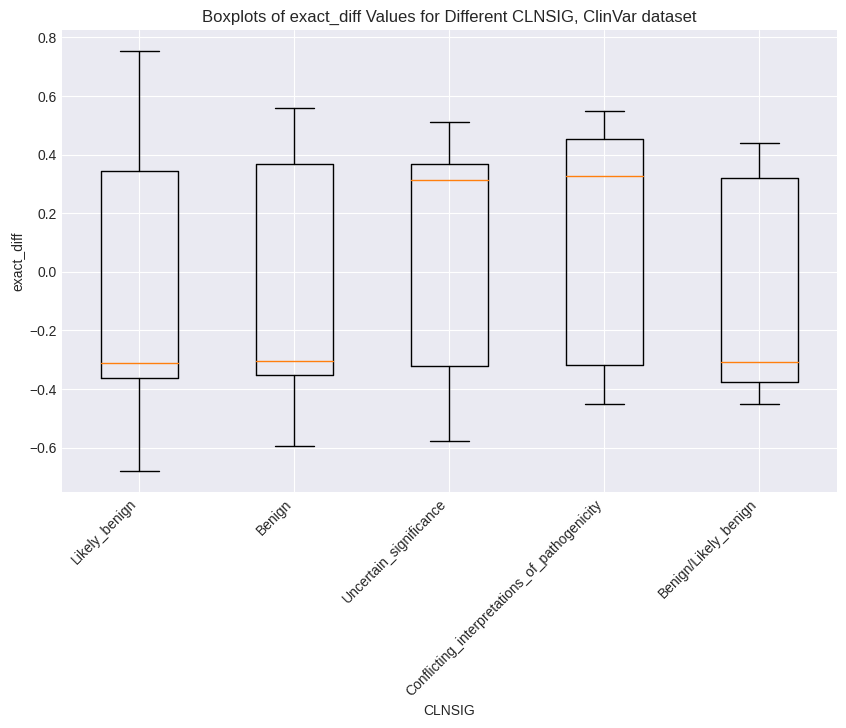

In [57]:
# Creating the boxplot using matplotlib
plt.figure(figsize=(10, 6))

# Create boxplots
plt.boxplot(
    [result_amino_retained_high_diff[result_amino_retained_high_diff['CLNSIG'] == label]['exact_diff'] for label in result_amino_retained_high_diff['CLNSIG'].unique()],
    labels=result_amino_retained_high_diff['CLNSIG'].unique()
)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add labels and title
title_tmp = 'Boxplots of exact_diff Values for Different CLNSIG, ClinVar dataset'
plt.xlabel('CLNSIG')
plt.ylabel('exact_diff')
plt.title(title_tmp)

# Show the plot
plt.show()
fig.savefig(FIGURES_FOLDER + title_tmp + ".png")

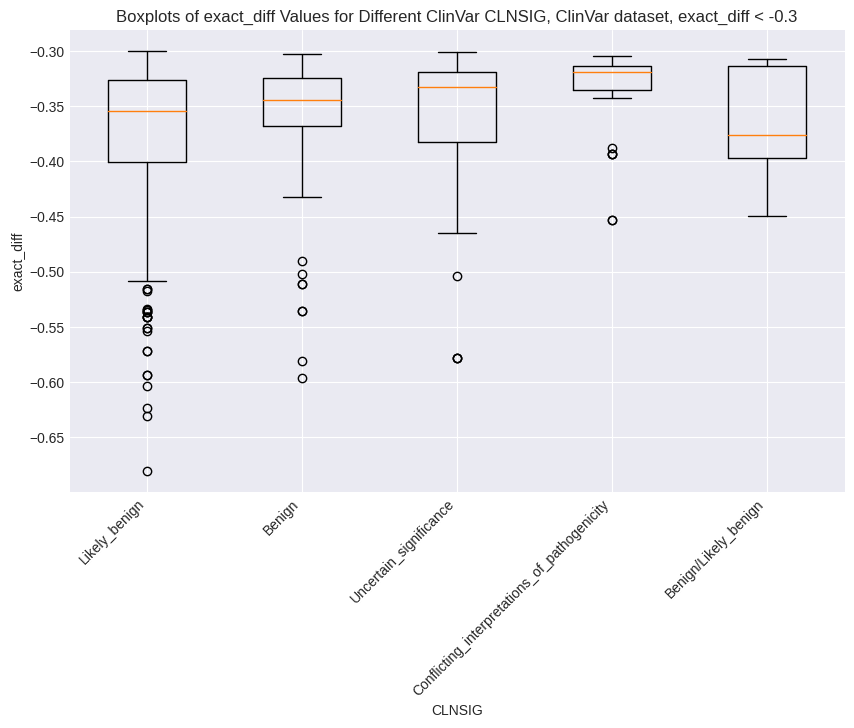

In [58]:
# Creating the boxplot using matplotlib
plt.figure(figsize=(10, 6))

# Create boxplots
plt.boxplot(
    [result_amino_retained_high_diff[(result_amino_retained_high_diff['CLNSIG'] == label) & (result_amino_retained_high_diff.exact_diff < -0.3)]['exact_diff'] for label in result_amino_retained_high_diff['CLNSIG'].unique()],
    labels=result_amino_retained_high_diff['CLNSIG'].unique()
)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

title_tmp = 'Boxplots of exact_diff Values for Different ClinVar CLNSIG, ClinVar dataset, exact_diff < -0.3'
plt.xlabel('CLNSIG')
plt.ylabel('exact_diff')
plt.title(title_tmp)

# Show the plot
plt.show()
fig.savefig(FIGURES_FOLDER + title_tmp + ".png")

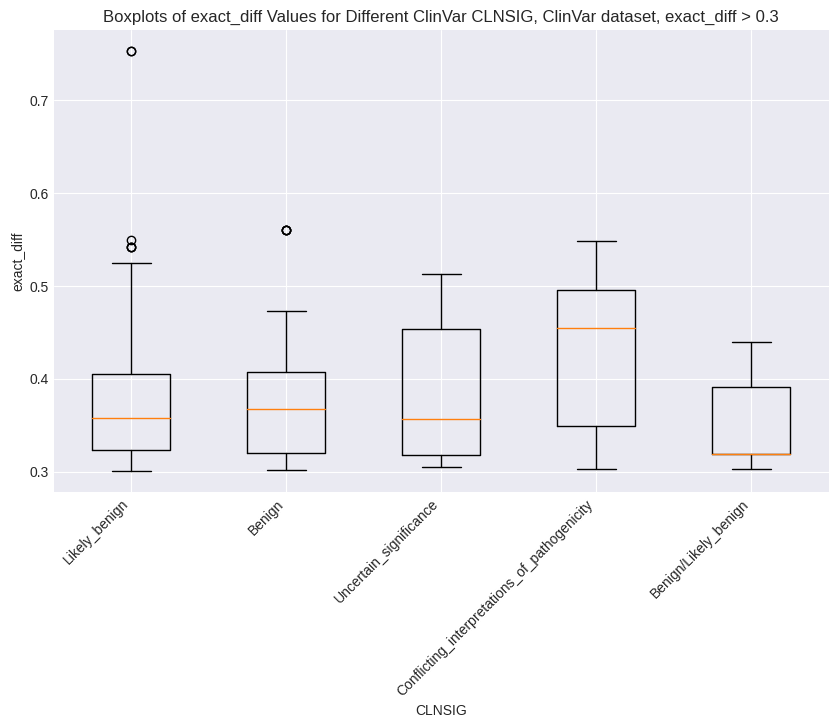

In [59]:
# Creating the boxplot using matplotlib
plt.figure(figsize=(10, 6))

# Create boxplots
plt.boxplot(
    [result_amino_retained_high_diff[(result_amino_retained_high_diff['CLNSIG'] == label) & (result_amino_retained_high_diff.exact_diff > 0.3)]['exact_diff'] for label in result_amino_retained_high_diff['CLNSIG'].unique()],
    labels=result_amino_retained_high_diff['CLNSIG'].unique()
)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

title_tmp = 'Boxplots of exact_diff Values for Different ClinVar CLNSIG, ClinVar dataset, exact_diff > 0.3'
plt.xlabel('CLNSIG')
plt.ylabel('exact_diff')
plt.title(title_tmp)

# Show the plot
plt.show()
fig.savefig(FIGURES_FOLDER + title_tmp + ".png")

In [67]:
clnsig_column = []
for row in result_amino_retained_high_diff.itertuples():
    clnsig = row.info_dict['CLNDN']
    clnsig_column.append(clnsig)
# Counter(clnsig_column)
result_amino_retained_high_diff['CLNDN'] = clnsig_column

/tmp/ipykernel_7514/3700600064.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_amino_retained_high_diff['CLNDN'] = clnsig_column


Familial_adenomatous_polyposis_1 12
not_provided 294
Cardiovascular_phenotype 40
Hereditary_nonpolyposis_colorectal_neoplasms|Hereditary_cancer-predisposing_syndrome 15
Hereditary_cancer-predisposing_syndrome 45
Inborn_genetic_diseases 19
Hereditary_nonpolyposis_colorectal_neoplasms 25
Inborn_genetic_diseases|Nephrolithiasis/nephrocalcinosis 16
Hereditary_cancer-predisposing_syndrome|Familial_adenomatous_polyposis_1 14
not_specified 10
Pseudohypoaldosteronism_type_2C|Neuropathy,_hereditary_sensory_and_autonomic,_type_2A 11
T-cell_immunodeficiency_with_epidermodysplasia_verruciformis 10
Alstrom_syndrome 21
Retinitis_pigmentosa_12|Leber_congenital_amaurosis_8 10


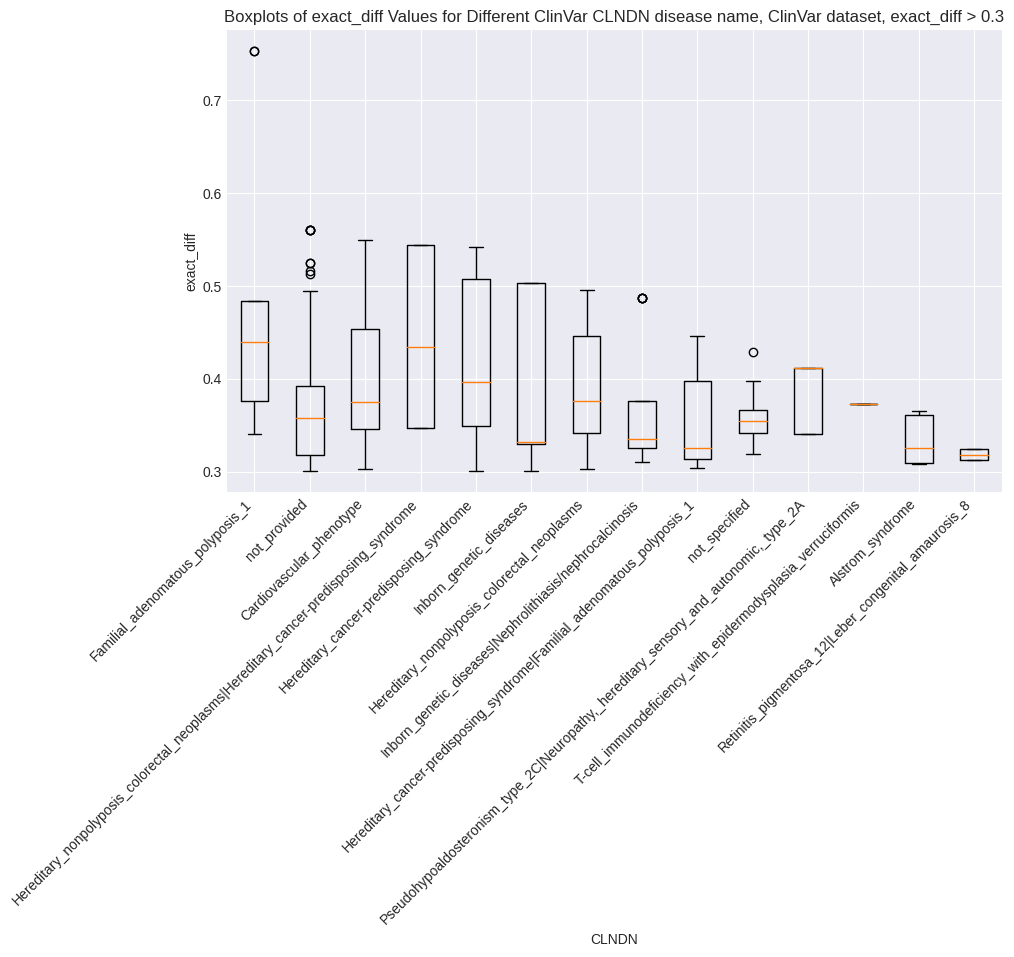

In [131]:
clnsig_counter = Counter(result_amino_retained_high_diff[result_amino_retained_high_diff.exact_diff > 0.3]['CLNDN'])
clnsig_counter = {x: count for x, count in clnsig_counter.items() if count >= 10}
{print(disease, count) for disease, count in clnsig_counter.items()}
# Creating the boxplot using matplotlib
plt.figure(figsize=(10, 6))

# Create boxplots
unique_labels = result_amino_retained_high_diff[result_amino_retained_high_diff.exact_diff > 0.3]['CLNDN'].unique()

filtered = [result_amino_retained_high_diff[
        (result_amino_retained_high_diff['CLNDN'] == label) 
        & (result_amino_retained_high_diff.exact_diff > 0.3)
    ]['exact_diff'] for label in clnsig_counter.keys()]

plt.boxplot(
    filtered,
    labels=clnsig_counter.keys()
)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

title_tmp = 'Boxplots of exact_diff Values for Different ClinVar CLNDN disease name, ClinVar dataset, exact_diff > 0.3'
plt.xlabel('CLNDN')
plt.ylabel('exact_diff')
plt.title(title_tmp)

# Show the plot
plt.show()
fig.savefig(FIGURES_FOLDER + title_tmp + ".png")

not_provided 353
Familial_adenomatous_polyposis_1 22
Biotinidase_deficiency 20
not_specified|not_provided 11
Alstrom_syndrome 21
Cardiovascular_phenotype 31
Hereditary_cancer-predisposing_syndrome|Hereditary_nonpolyposis_colorectal_neoplasms 10
Retinitis_pigmentosa_12|Leber_congenital_amaurosis_8 30
Inborn_genetic_diseases 14
Hereditary_cancer-predisposing_syndrome 41
not_specified 21
Neuronal_ceroid_lipofuscinosis 16
Autosomal_dominant_hypocalcemia_1|Familial_hypocalciuric_hypercalcemia 16
Bardet-Biedl_syndrome 10
Walker-Warburg_congenital_muscular_dystrophy 14
Hereditary_cancer-predisposing_syndrome|Familial_adenomatous_polyposis_1 10
Inborn_genetic_diseases|Nephrolithiasis/nephrocalcinosis 16
Early-onset_Lafora_body_disease 24
Hereditary_nonpolyposis_colorectal_neoplasms|Hereditary_cancer-predisposing_syndrome 11
Leber_congenital_amaurosis_8|Retinitis_pigmentosa_12 15
not_provided|Hereditary_nonpolyposis_colorectal_neoplasms|Hereditary_cancer-predisposing_syndrome 10
Hereditary_nonp

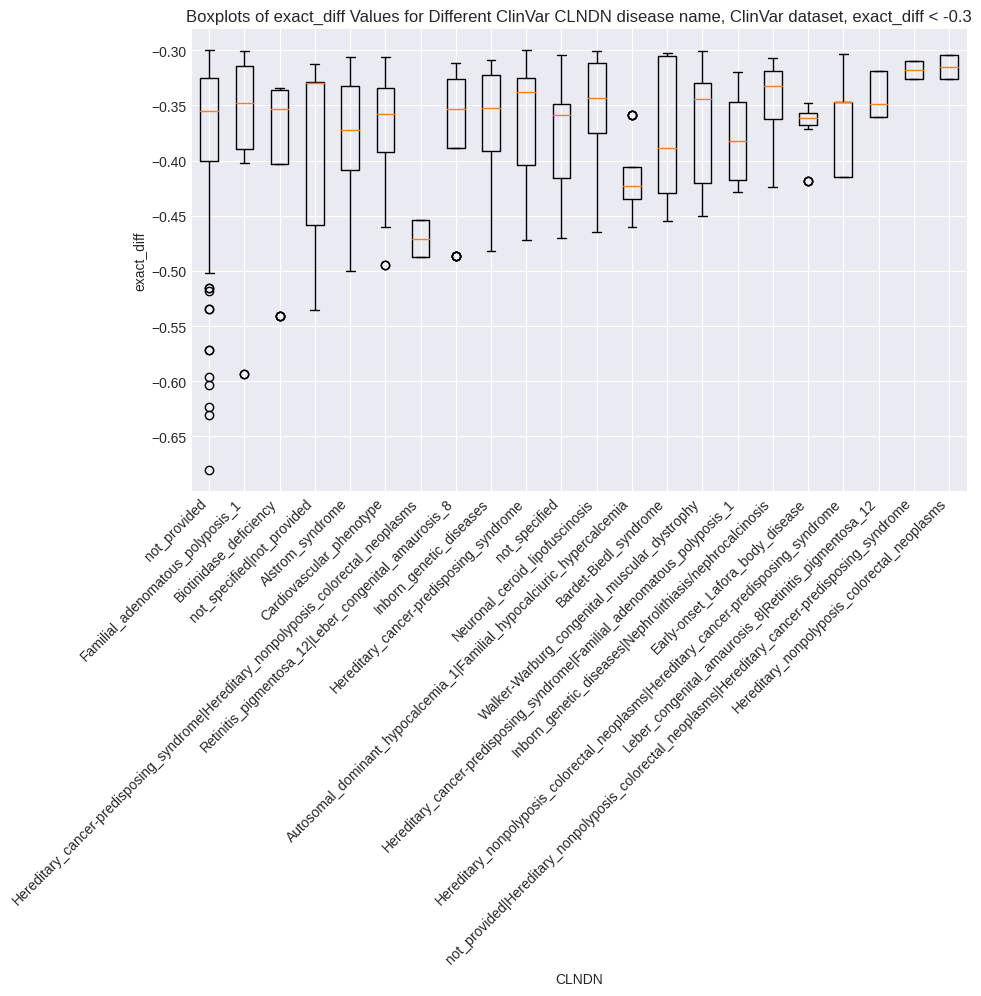

In [137]:
clnsig_counter = Counter(result_amino_retained_high_diff[result_amino_retained_high_diff.exact_diff < -0.3]['CLNDN'])
clnsig_counter = {x: count for x, count in clnsig_counter.items() if count >= 10}
{print(disease, count) for disease, count in clnsig_counter.items()}
# Creating the boxplot using matplotlib
plt.figure(figsize=(10, 6))

# Create boxplots
unique_labels = result_amino_retained_high_diff[result_amino_retained_high_diff.exact_diff < -0.3]['CLNDN'].unique()

filtered = [result_amino_retained_high_diff[
        (result_amino_retained_high_diff['CLNDN'] == label) 
        & (result_amino_retained_high_diff.exact_diff < -0.3)
    ]['exact_diff'] for label in clnsig_counter.keys()]

plt.boxplot(
    filtered,
    labels=clnsig_counter.keys()
)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

title_tmp = 'Boxplots of exact_diff Values for Different ClinVar CLNDN disease name, ClinVar dataset, exact_diff < -0.3'
plt.xlabel('CLNDN')
plt.ylabel('exact_diff')
plt.title(title_tmp)

# Show the plot
plt.show()
fig.savefig(FIGURES_FOLDER + title_tmp + ".png")

Familial_adenomatous_polyposis_1 34
not_provided 647
Cardiovascular_phenotype 71
Hereditary_nonpolyposis_colorectal_neoplasms|Hereditary_cancer-predisposing_syndrome 26
Hereditary_cancer-predisposing_syndrome 86
Biotinidase_deficiency 20
Inborn_genetic_diseases 33
Alstrom_syndrome 42
Hereditary_nonpolyposis_colorectal_neoplasms 35
Inborn_genetic_diseases|Nephrolithiasis/nephrocalcinosis 32
Retinitis_pigmentosa_12|Leber_congenital_amaurosis_8 40
not_specified 31
Hereditary_cancer-predisposing_syndrome|Familial_adenomatous_polyposis_1 24
Early-onset_Lafora_body_disease 27
Leber_congenital_amaurosis_8|Retinitis_pigmentosa_12 20


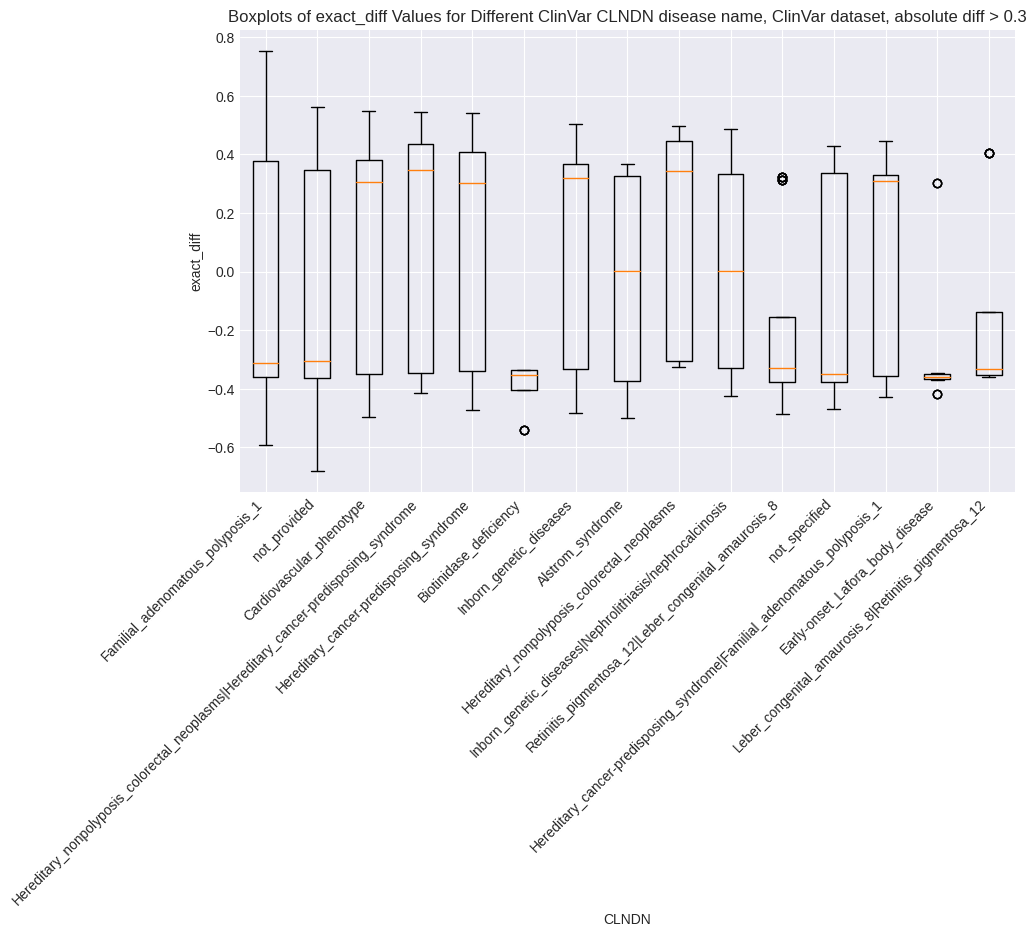

In [136]:
clnsig_counter = Counter(result_amino_retained_high_diff[result_amino_retained_high_diff.prediction_diff > 0.3]['CLNDN'])
clnsig_counter = {x: count for x, count in clnsig_counter.items() if count >= 20}
{print(disease, count) for disease, count in clnsig_counter.items()}
# Creating the boxplot using matplotlib
plt.figure(figsize=(10, 6))

# Create boxplots
unique_labels = result_amino_retained_high_diff[result_amino_retained_high_diff.prediction_diff > 0.3]['CLNDN'].unique()

filtered = [result_amino_retained_high_diff[
        (result_amino_retained_high_diff['CLNDN'] == label) 
        & (result_amino_retained_high_diff.prediction_diff > 0.3)
    ]['exact_diff'] for label in clnsig_counter.keys()]

plt.boxplot(
    filtered,
    labels=clnsig_counter.keys()
)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

title_tmp = 'Boxplots of exact_diff Values for Different ClinVar CLNDN disease name, ClinVar dataset, absolute diff > 0.3'
plt.xlabel('CLNDN')
plt.ylabel('exact_diff')
plt.title(title_tmp)

# Show the plot
plt.show()
fig.savefig(FIGURES_FOLDER + title_tmp + ".png")

In [190]:
# result_amino_retained_high_diff
a=0
for i in result_amino_retained_high_diff[result_amino_retained_high_diff.exact_diff > 0.3]['info'].map(parse_first_level_of_info_to_list):
    print(i,end='\n\n')
    a+=1
    if a>5:
        break

OrderedDict([('ALLELEID', '1600689'), ('CLNDISDB', 'MONDO:MONDO:0021056,MedGen:C2713442,OMIM:175100'), ('CLNDN', 'Familial_adenomatous_polyposis_1'), ('CLNHGVS', 'NC_000005.10:g.112840616A>C'), ('CLNREVSTAT', 'criteria_provided,_single_submitter'), ('CLNSIG', 'Likely_benign'), ('CLNVC', 'single_nucleotide_variant'), ('CLNVCSO', 'SO:0001483'), ('GENEINFO', 'APC:324'), ('MC', 'SO:0001819|synonymous_variant'), ('ORIGIN', '1')])

OrderedDict([('ALLELEID', '1600689'), ('CLNDISDB', 'MONDO:MONDO:0021056,MedGen:C2713442,OMIM:175100'), ('CLNDN', 'Familial_adenomatous_polyposis_1'), ('CLNHGVS', 'NC_000005.10:g.112840616A>C'), ('CLNREVSTAT', 'criteria_provided,_single_submitter'), ('CLNSIG', 'Likely_benign'), ('CLNVC', 'single_nucleotide_variant'), ('CLNVCSO', 'SO:0001483'), ('GENEINFO', 'APC:324'), ('MC', 'SO:0001819|synonymous_variant'), ('ORIGIN', '1')])

OrderedDict([('AF_ESP', '0.04086'), ('AF_EXAC', '0.03326'), ('AF_TGP', '0.01558'), ('ALLELEID', '793491'), ('CLNDISDB', 'MedGen:CN517202'), 

In [167]:
from utils import convert_to_eqtl_format

TO_SAMPLE = 20

result_amino_retained_high_diff_head = result_amino_retained_high_diff.head(TO_SAMPLE)

variants_eqtl_format = []
for i in range(TO_SAMPLE):
    variants_eqtl_format.append(
        convert_to_eqtl_format(
            result_amino_retained_high_diff.info_dict.values[i]['CLNHGVS'])
    )

result_amino_retained_high_diff_head['variant_eqtl_format'] = variants_eqtl_format

/tmp/ipykernel_7514/307712825.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_amino_retained_high_diff_head['variant_eqtl_format'] = variants_eqtl_format


In [168]:
from utils import convert_to_eqtl_format

hgvs_example = "NC_000013.11:g.114184638T>C"
gtex_variant = convert_to_eqtl_format(hgvs_example)
print(gtex_variant)


chr13_114184638_T_C


In [198]:
rs_ids = []
a=0
for i in result_amino_retained_high_diff['info'].map(parse_first_level_of_info_to_list):
    # print(i,end='\n\n')
    try:
        rs_ids.append("rs"+i['RS'])
    except:
        rs_ids.append('')
    # a+=1
    # if a>100:
        # break
result_amino_retained_high_diff['rs_id'] = rs_ids

/tmp/ipykernel_7514/2917141772.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_amino_retained_high_diff['rs_id'] = rs_ids


In [200]:
result_amino_retained_high_diff[result_amino_retained_high_diff['rs_id'].str.len() > 0]#['rs_id']

,transcript_ids,exact_diff,ref_sequence,alt_sequence,ref_alt,first_codons,cut_distances_from_first_cds_nt,variant_position_relative_to_transcript,info,ref_pred,...,prediction_diff,frame_index,codon,amino,variant_consequence,ALLELEID,info_dict,CLNSIG,CLNDN,rs_id
171763,ENST00000307584,-0.603666,AGAGGTTTAAGAAATCTATTTCTAATGCAGCTCCCTCAAAGGAAGC...,AGAGGTTTAAGAAATCTATTTCTAATGCAGCTCCCTCAAAGGAAGC...,G/A,ATG,857,922,AF_ESP=0.00015;AF_EXAC=0.00001;ALLELEID=502403...,0.235733,...,0.603666,2,GAG/GAA,E,Amino_retained,502403,"{'AF_ESP': '0.00015', 'AF_EXAC': '0.00001', 'A...",Likely_benign,not_provided,rs371552277
306348,ENST00000374375,-0.580757,TGAAGTTGACATGCAGTGCCTTCCGACTGCAGCGAGCCTTAAGGTT...,TGAAGTTGACATGCAGTGCCTTCCGACTGCAGCGAGCCTTAAGGTT...,C/A,ATG,128,570,AF_ESP=0.00008;AF_EXAC=0.00098;AF_TGP=0.00379;...,0.192821,...,0.580757,2,CGC/CGA,R,Amino_retained,349919,"{'AF_ESP': '0.00008', 'AF_EXAC': '0.00098', 'A...",Benign,not_provided|Multiple_synostoses_syndrome_2|Ac...,rs138130158
310071,ENST00000356577,-0.578329,TTATGAAAGGAATTAATCTATCCTCTGGTGATCAAAATCTTGCTCC...,TTATGAAAGGAATTAATCTATCCTCTGGTGATCAAAATCTTGCTCC...,G/A,ATG,4547,5022,"ALLELEID=1018741;CLNDISDB=MONDO:MONDO:0014936,...",0.184031,...,0.578329,2,GAG/GAA,E,Amino_retained,1018741,"{'ALLELEID': '1018741', 'CLNDISDB': 'MONDO:MON...",Uncertain_significance,ZTTK_syndrome,rs2085879819
310072,ENST00000381679,-0.578329,TTATGAAAGGAATTAATCTATCCTCTGGTGATCAAAATCTTGCTCC...,TTATGAAAGGAATTAATCTATCCTCTGGTGATCAAAATCTTGCTCC...,G/A,ATG,4547,4575,"ALLELEID=1018741;CLNDISDB=MONDO:MONDO:0014936,...",0.184031,...,0.578329,2,GAG/GAA,E,Amino_retained,1018741,"{'ALLELEID': '1018741', 'CLNDISDB': 'MONDO:MON...",Uncertain_significance,ZTTK_syndrome,rs2085879819
310073,ENST00000300278,-0.578329,TTATGAAAGGAATTAATCTATCCTCTGGTGATCAAAATCTTGCTCC...,TTATGAAAGGAATTAATCTATCCTCTGGTGATCAAAATCTTGCTCC...,G/A,ATG,4547,4576,"ALLELEID=1018741;CLNDISDB=MONDO:MONDO:0014936,...",0.184031,...,0.578329,2,GAG/GAA,E,Amino_retained,1018741,"{'ALLELEID': '1018741', 'CLNDISDB': 'MONDO:MON...",Uncertain_significance,ZTTK_syndrome,rs2085879819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190639,ENST00000254579,0.300486,GGGCACCCTGGGTCCAAACCCACCTCCATCTGGACCTGCTAGGTGC...,GGGCACCCTGGGTCCAAACCCACCTCCATCTGGACCTGCTAGGTGC...,T/G,ATG,440,1004,AF_EXAC=0.00001;ALLELEID=768591;CLNDISDB=MedGe...,0.672950,...,0.300486,2,GCT/GCG,A,Amino_retained,768591,"{'AF_EXAC': '0.00001', 'ALLELEID': '768591', '...",Likely_benign,not_provided,rs781465593
190638,ENST00000527990,0.300486,GGGCACCCTGGGTCCAAACCCACCTCCATCTGGACCTGCTAGGTGC...,GGGCACCCTGGGTCCAAACCCACCTCCATCTGGACCTGCTAGGTGC...,T/G,ATG,440,440,AF_EXAC=0.00001;ALLELEID=768591;CLNDISDB=MedGe...,0.672950,...,0.300486,2,GCT/GCG,A,Amino_retained,768591,"{'AF_EXAC': '0.00001', 'ALLELEID': '768591', '...",Likely_benign,not_provided,rs781465593
112505,ENST00000508376,-0.300276,ACCCTAGAACCAAATCCAGCAGACTGCAGGGTTCTAGTTTATCTTC...,ACCCTAGAACCAAATCCAGCAGACTGCAGGGTTCTAGTTTATCTTC...,C/G,ATG,4085,4242,AF_EXAC=0.00001;ALLELEID=454756;CLNDISDB=MONDO...,0.354526,...,0.300276,2,TCC/TCG,S,Amino_retained,454756,"{'AF_EXAC': '0.00001', 'ALLELEID': '454756', '...",Likely_benign,Familial_adenomatous_polyposis_1,rs763053012
112504,ENST00000257430,-0.300276,ACCCTAGAACCAAATCCAGCAGACTGCAGGGTTCTAGTTTATCTTC...,ACCCTAGAACCAAATCCAGCAGACTGCAGGGTTCTAGTTTATCTTC...,C/G,ATG,4085,4141,AF_EXAC=0.00001;ALLELEID=454756;CLNDISDB=MONDO...,0.354526,...,0.300276,2,TCC/TCG,S,Amino_retained,454756,"{'AF_EXAC': '0.00001', 'ALLELEID': '454756', '...",Likely_benign,Familial_adenomatous_polyposis_1,rs763053012
